## **兴趣电商膳食营养补充食品交易及广告投放渠道分析**

#### 背景：
##### 视频推荐算法基于大数据用户画像，深层挖掘用户兴趣，需求，在用户主动搜索前，通过信息流广告主动推荐用户可能感兴趣的商品。

#### 业务流程:

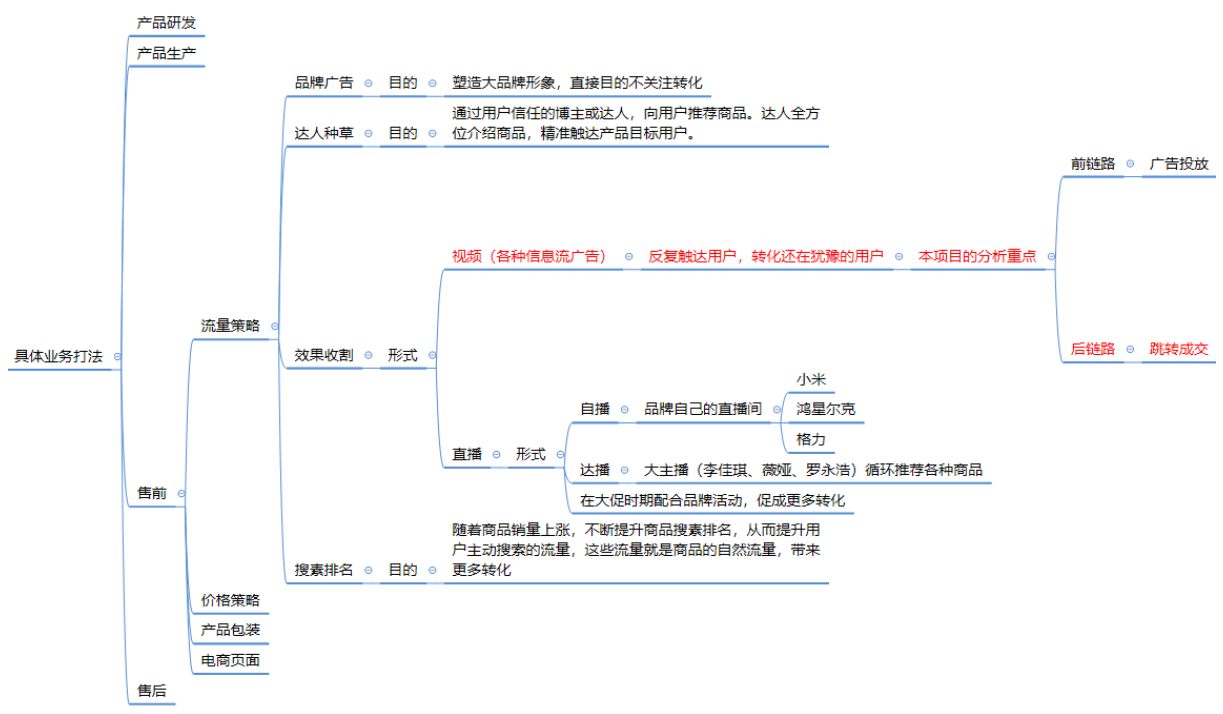

In [898]:
from IPython.display import Image
Image("images/业务流程.PNG", width = 1000)

# ![业务流程](images/业务流程.PNG)
# <img src = "images/业务流程.png" width = "1000" />
# <img src = "images/业务流程.png" width = "1000">

#### 用户行为路径：

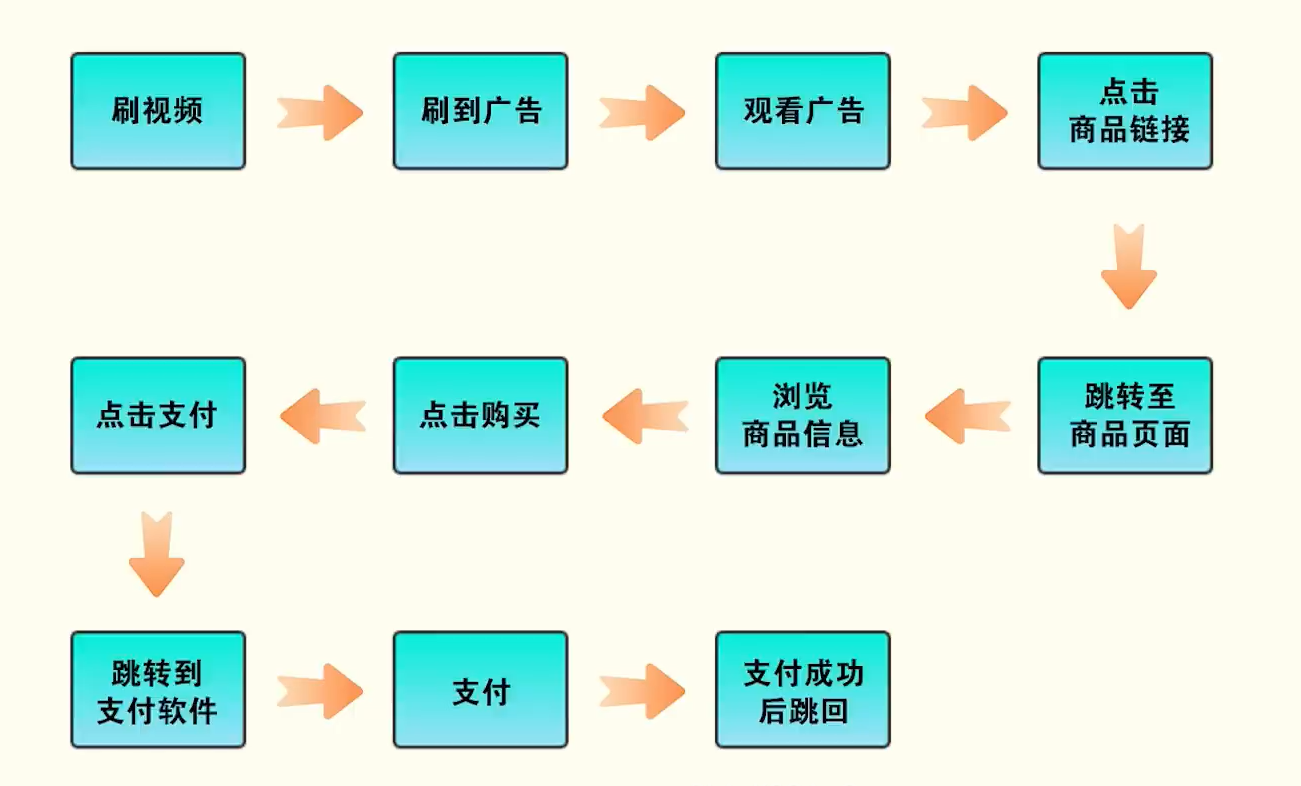

In [899]:
Image("images/用户行为路径.PNG", width = 600)

# ![用户行为路径](images/用户行为路径.png)
# <img src="images/用户行为路径.png" width="600" />

#### 目标

##### 1、广告投放渠道优化;
##### 2、商品品类优化;
##### 3、用户行为洞察。

##### --- **最终都是为了促成更多成交，提升营收及利润**

#### 一、初步查看数据

In [900]:
# 导入依赖包
import numpy as np
import pandas as pd

##### 这里选取最大的文件查看，除了初步熟悉指标外，可以更好地评估数据量级。

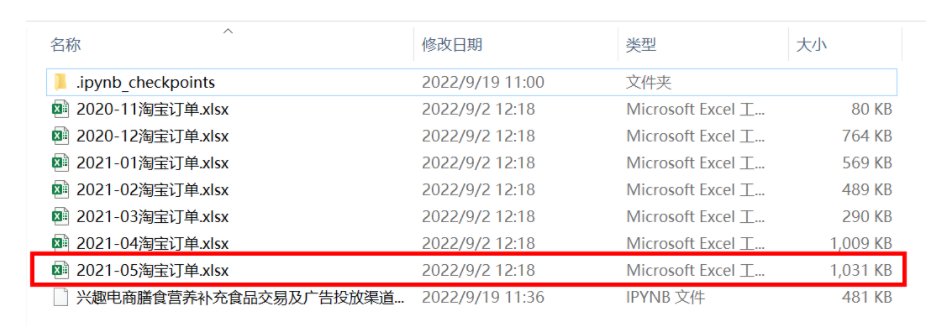

In [901]:
Image("images/选取最大文件.PNG", width = 600)

# <img src="images/用户行为路径.png" width="600" />

In [902]:
test = pd.read_excel('2021-05淘宝订单.xlsx') # 读入excel文件

test.head() # 查看前5行

点击月份        点击日期                 点击时间  结算时间                 创建时间  \
0  2021-05  2021-05-08  2021-05-08 19:34:57   NaN  2021-05-09 01:58:00   
1  2021-05  2021-05-08  2021-05-08 19:34:57   NaN  2021-05-09 01:58:00   
2  2021-05  2021-05-09  2021-05-09 01:53:50   NaN  2021-05-09 01:55:00   
3  2021-05  2021-05-09  2021-05-09 01:53:50   NaN  2021-05-09 01:55:00   
4  2021-05  2021-05-09  2021-05-09 01:27:34   NaN  2021-05-09 01:29:00   

                  付款时间               淘宝付款时间  品牌名称           商品ID  \
0  2021-05-09 01:59:05  2021-05-09 01:58:00  vita  8415498144485   
1  2021-05-09 01:59:05  2021-05-09 01:58:00  vita  8389801605463   
2  2021-05-09 01:55:24  2021-05-09 01:55:00  vita  8406736482903   
3  2021-05-09 01:55:24  2021-05-09 01:55:00  vita  8415498144485   
4  2021-05-09 01:29:33  2021-05-09 01:29:00  vita  8406736482903   

                             商品标题  ... 淘宝子订单号 订单状态  订单类型    付款金额 结算金额  佣金比率  \
0  vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...    NaN  已付款    天猫  193.24  NaN  0.03   
1  VITA复合维生素ce女性综合叶酸生物素矿物质营养软糖90粒  ...    NaN  已付款    天猫  159.49  NaN  0.03   
2      【VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...    NaN  已付款    天猫    0.00  NaN  0.03   
3  vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...    NaN  已付款    天猫  159.89  NaN  0.03   
4      【VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...    NaN  已付款    天猫    0.00  NaN  0.03   

   佣金金额           推广位ID     推广位名称  成交平台  
0   NaN  19000062989104  VproI525    无线  
1   NaN  19000062989104  VproI525    无线  
2   NaN  19000063039124  VproI529    无线  
3   NaN  19000063039124  VproI529    无线  
4   NaN  19000066689017  VproI526    无线  

[5 rows x 26 columns]

In [903]:
# 查看指标统计情况
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074 entries, 0 to 8073
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   点击月份    8074 non-null   object 
 1   点击日期    8074 non-null   object 
 2   点击时间    8074 non-null   object 
 3   结算时间    0 non-null      float64
 4   创建时间    8074 non-null   object 
 5   付款时间    8074 non-null   object 
 6   淘宝付款时间  8074 non-null   object 
 7   品牌名称    8074 non-null   object 
 8   商品ID    8074 non-null   int64  
 9   商品标题    8074 non-null   object 
 10  掌柜旺旺    8074 non-null   object 
 11  店铺名称    8074 non-null   object 
 12  商品数量    8074 non-null   int64  
 13  商品单价    8074 non-null   int64  
 14  类目名称    8074 non-null   object 
 15  淘宝订单编号  8074 non-null   int64  
 16  淘宝子订单号  0 non-null      float64
 17  订单状态    8074 non-null   object 
 18  订单类型    8074 non-null   object 
 19  付款金额    8074 non-null   float64
 20  结算金额    0 non-null      float64
 21  佣金比率    8074 non-null   float64
 22  

##### —————————————————————————————————————————————————
##### 从指标统计中，我们可以看到：
##### 1、一共有25个指标，每个指标包含的观测值为8074条
##### 2、本文件大小为1MB，总文件大小为4MB，因此预估合并后的数据量级约为3万条左右；
##### 2、有3个指标没有数据，它们分别为【结算时间】、【淘宝子订单号】、【佣金金额】。考虑到这三个指标，对于本项目分析没有很大帮助，因此后续合并后可以直接删除。
##### —————————————————————————————————————————————————

##### **指标定义**:
##### 【点击时间】：用户浏览信息流广告，从广告所附带的连接点击，跳转到商品页面时所记录的瞬时时间；
##### 【点击月份】：从【点击时间】字段中抽出；
##### 【点击时间】：从【点击时间】字段中抽出；
##### 【结算时间】：用户点击收货后，平台将款项结算给商家的时间；
##### 【结算金额】：用户点击收货后，平台结算给商家的款项金额；
##### 【创建时间】：用户在淘宝商品页面中，创建购买订单时，所记录的瞬时时间；
##### 【淘宝付款时间】：用户在淘宝商品页面中，点击付款时，所记录的瞬时时间；
##### 【付款时间】：用户在淘宝页面点击付款后，跳转到支付页面，支付成功时，所记录的瞬时时间；
##### 【品牌名称】：商品的品牌名称；
##### 【商品ID】：商品的标识编号；
##### 【商品标题】：商品在商品页面顶部所显示的标题名称；
##### 【掌柜旺旺】：商家旺旺号的名称；
##### 【店铺名称】：商家店铺的名称；
##### 【商品数量】：用户所购买的某款商品的数量；
##### 【商品单价】：用户所购买的某款商品的单价；
##### 【类目名称】：用户所购买的某款商品的品类；
##### 【淘宝订单编号】：本条记录的淘宝订单的标识编号；
##### 【淘宝子订单号】：本条记录的淘宝订单的子订单的编号；
##### 【订单状态】：订单的状态区分，分为已付款/已失效；
##### 【订单类型】：成交订单的流量入口，分为淘宝/聚划算。淘宝：本店铺成交，聚划算-促销活动；
##### 【付款金额】：本条记录的订单所对应的结算金额；
##### 【佣金比率】：给广告商或明星达人的抽成比例（广告、宣传抽成），会根据总额进行动态调整；
##### 【佣金金额】：本条记录的订单所对应的佣金金额；
##### 【推广位ID】：用户点击进入商品界面的推广位的标识编号；
##### 【推广位名称】：用户点击进入商品界面的推广位的名称；
##### 【成交平台】：本条记录的订单成交的平台，分为无线（手机端）/PC（电脑端）。

In [904]:
# 获取原始数据基本统计信息
test.describe()

结算时间          商品ID         商品数量         商品单价        淘宝订单编号  淘宝子订单号  \
count   0.0  8.074000e+03  8074.000000  8074.000000  8.074000e+03     0.0   
mean    NaN  8.412252e+12     1.024523   228.057345  8.330839e+18     NaN   
std     NaN  5.956329e+09     0.165509    78.463059  2.221966e+17     NaN   
min     NaN  8.389038e+12     1.000000     1.000000  7.955039e+18     NaN   
25%     NaN  8.406736e+12     1.000000   269.000000  7.977421e+18     NaN   
50%     NaN  8.415498e+12     1.000000   269.000000  8.456312e+18     NaN   
75%     NaN  8.415498e+12     1.000000   269.000000  8.472432e+18     NaN   
max     NaN  8.422947e+12     4.000000   807.000000  8.535835e+18     NaN   

              付款金额  结算金额          佣金比率  佣金金额         推广位ID  
count  8074.000000   0.0  8.074000e+03   0.0  8.074000e+03  
mean    129.360088   NaN  3.000000e-02   NaN  1.900007e+13  
std      78.856785   NaN  1.044368e-15   NaN  2.989023e+07  
min       0.000000   NaN  3.000000e-02   NaN  1.899971e+13  
25%     137.660000   NaN  3.000000e-02   NaN  1.900006e+13  
50%     163.020000   NaN  3.000000e-02   NaN  1.900007e+13  
75%     169.680000   NaN  3.000000e-02   NaN  1.900007e+13  
max     681.520000   NaN  3.000000e-02   NaN  1.900025e+13

##### 除了商品单价和付款金额外，暂时无法通过基本统计获得有价值的信息。

#### 二、合并数据

In [905]:
# 合并文件

import os

path = os.getcwd() # 获取当前工作文件路径
files = os.listdir(path) # 获取当前路径下的文件列表
files

['.ipynb_checkpoints',
 '2020-11淘宝订单.xlsx',
 '2020-12淘宝订单.xlsx',
 '2021-01淘宝订单.xlsx',
 '2021-02淘宝订单.xlsx',
 '2021-03淘宝订单.xlsx',
 '2021-04淘宝订单.xlsx',
 '2021-05淘宝订单.xlsx',
 'images',
 '兴趣电商膳食营养补充食品交易及广告投放渠道分析.ipynb']

In [906]:
files_xls = [f for f in files if f[-4:] == 'xlsx'] # 截取目标文件
files_xls

['2020-11淘宝订单.xlsx',
 '2020-12淘宝订单.xlsx',
 '2021-01淘宝订单.xlsx',
 '2021-02淘宝订单.xlsx',
 '2021-03淘宝订单.xlsx',
 '2021-04淘宝订单.xlsx',
 '2021-05淘宝订单.xlsx']

In [907]:
df = pd.DataFrame() # 创建一个空的数据框DataFrame

# 依次读取文件并写入df
for f in files_xls:
    data = pd.read_excel(f)
    df = df.append(data)
    

In [908]:
# 查看合并后的文件
df.head()

点击月份        点击日期                 点击时间  结算时间                 创建时间  \
0  2020-11  2020-11-25  2020-11-25 04:25:04   NaN  2020-11-28 16:38:00   
1  2020-11  2020-11-28  2020-11-28 01:27:09   NaN  2020-11-28 13:25:00   
2  2020-11  2020-11-14  2020-11-14 05:24:24   NaN  2020-11-28 13:07:00   
3  2020-11  2020-11-28  2020-11-28 08:10:45   NaN  2020-11-28 08:14:00   
4  2020-11  2020-11-25  2020-11-25 05:35:22   NaN  2020-11-28 06:37:00   

                  付款时间               淘宝付款时间  品牌名称           商品ID  \
0  2020-11-28 16:38:58  2020-11-28 16:38:00  vita  8391485512245   
1  2020-11-28 13:25:35  2020-11-28 13:25:00  vita  8391485512245   
2  2020-11-28 13:07:52  2020-11-28 13:07:00  vita  8406711827254   
3  2020-11-28 08:14:23  2020-11-28 08:14:00  vita  8391485512245   
4  2020-11-28 06:38:06  2020-11-28 06:37:00  vita  8391485512245   

                                       商品标题  ... 淘宝子订单号 订单状态  订单类型     付款金额  \
0  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...    NaN  已付款   聚划算   97.563   
1  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...    NaN  已付款   聚划算  113.230   
2                 VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...    NaN  已失效    天猫   45.730   
3  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...    NaN  已付款   聚划算   93.230   
4  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...    NaN  已付款   聚划算   93.230   

  结算金额  佣金比率  佣金金额           推广位ID      推广位名称  成交平台  
0  NaN  0.03   NaN  18999721388976  VsleepI31    无线  
1  NaN  0.03   NaN  18999721388976  VsleepI31    无线  
2  NaN  0.03   NaN  18999721388976  VsleepI31    无线  
3  NaN  0.03   NaN  18999725939298  VsleepI38    无线  
4  NaN  0.03   NaN  18999721388976  VsleepI31    无线  

[5 rows x 26 columns]

In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31036 entries, 0 to 8073
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   点击月份    31036 non-null  object 
 1   点击日期    31036 non-null  object 
 2   点击时间    31036 non-null  object 
 3   结算时间    0 non-null      float64
 4   创建时间    31036 non-null  object 
 5   付款时间    31036 non-null  object 
 6   淘宝付款时间  31036 non-null  object 
 7   品牌名称    31036 non-null  object 
 8   商品ID    31036 non-null  int64  
 9   商品标题    31036 non-null  object 
 10  掌柜旺旺    31036 non-null  object 
 11  店铺名称    31036 non-null  object 
 12  商品数量    31036 non-null  int64  
 13  商品单价    31036 non-null  float64
 14  类目名称    31036 non-null  object 
 15  淘宝订单编号  31036 non-null  int64  
 16  淘宝子订单号  0 non-null      float64
 17  订单状态    31036 non-null  object 
 18  订单类型    31036 non-null  object 
 19  付款金额    31036 non-null  float64
 20  结算金额    0 non-null      float64
 21  佣金比率    31036 non-null  float64
 22 

##### —————————————————————————————————————————————————
##### 1、合并后的文件共有31036条数据；
##### 2、作者利用Tableau Prep Builder合并数据后也得到了相同的数据量，证明合并有效；
##### 3、除【结算时间】、【淘宝子订单号】、【佣金金额】三个字段外，文件没有缺失值；
##### —————————————————————————————————————————————————

#### 三、清洗数据

In [910]:
# 1）增

# 填补【淘宝子订单号】字段

# 将订单编号+商品ID作为每条记录的唯一区分

 # 待合并的两个字段为int64类型，需要转换为str后，以'-'连接进行合并。
df["淘宝子订单号"] =  df['淘宝订单编号'].astype(str) + "-" + df["商品ID"].astype(str)

df["淘宝子订单号"].head()

0    8065181419668915893-8391485512245
1    8063912851627027323-8391485512245
2    7892831287092672354-8406711827254
3    8063220174922537133-8391485512245
4    8064435682184005043-8391485512245
Name: 淘宝子订单号, dtype: object

In [911]:
# 2) 删
# 删除对本项目分析无关的字段

drop_list = ['结算时间', # 空值字段
             '佣金金额', # 空值字段
            '掌柜旺旺', # 对本项目分析无帮助
            '店铺名称', # 对本项目分析无帮助
            '结算金额', # 对本项目分析无帮助
             '品牌名称', # 数据仅有一个品牌
            '佣金比率'] # 数据缺失，对本项目分析无帮助

df = df.drop(columns = drop_list)

df.head()

点击月份        点击日期                 点击时间                 创建时间  \
0  2020-11  2020-11-25  2020-11-25 04:25:04  2020-11-28 16:38:00   
1  2020-11  2020-11-28  2020-11-28 01:27:09  2020-11-28 13:25:00   
2  2020-11  2020-11-14  2020-11-14 05:24:24  2020-11-28 13:07:00   
3  2020-11  2020-11-28  2020-11-28 08:10:45  2020-11-28 08:14:00   
4  2020-11  2020-11-25  2020-11-25 05:35:22  2020-11-28 06:37:00   

                  付款时间               淘宝付款时间           商品ID  \
0  2020-11-28 16:38:58  2020-11-28 16:38:00  8391485512245   
1  2020-11-28 13:25:35  2020-11-28 13:25:00  8391485512245   
2  2020-11-28 13:07:52  2020-11-28 13:07:00  8406711827254   
3  2020-11-28 08:14:23  2020-11-28 08:14:00  8391485512245   
4  2020-11-28 06:38:06  2020-11-28 06:37:00  8391485512245   

                                       商品标题  商品数量   商品单价      类目名称  \
0  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
1  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
2                 VITA褪黑素sleep安神助眠睡眠软糖原装10粒     1   69.9  膳食营养补充食品   
3  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
4  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   

                淘宝订单编号                             淘宝子订单号 订单状态 订单类型     付款金额  \
0  8065181419668915893  8065181419668915893-8391485512245  已付款  聚划算   97.563   
1  8063912851627027323  8063912851627027323-8391485512245  已付款  聚划算  113.230   
2  7892831287092672354  7892831287092672354-8406711827254  已失效   天猫   45.730   
3  8063220174922537133  8063220174922537133-8391485512245  已付款  聚划算   93.230   
4  8064435682184005043  8064435682184005043-8391485512245  已付款  聚划算   93.230   

            推广位ID      推广位名称 成交平台  
0  18999721388976  VsleepI31   无线  
1  18999721388976  VsleepI31   无线  
2  18999721388976  VsleepI31   无线  
3  18999725939298  VsleepI38   无线  
4  18999721388976  VsleepI31   无线

In [912]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31036 entries, 0 to 8073
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   点击月份    31036 non-null  object 
 1   点击日期    31036 non-null  object 
 2   点击时间    31036 non-null  object 
 3   创建时间    31036 non-null  object 
 4   付款时间    31036 non-null  object 
 5   淘宝付款时间  31036 non-null  object 
 6   商品ID    31036 non-null  int64  
 7   商品标题    31036 non-null  object 
 8   商品数量    31036 non-null  int64  
 9   商品单价    31036 non-null  float64
 10  类目名称    31036 non-null  object 
 11  淘宝订单编号  31036 non-null  int64  
 12  淘宝子订单号  31036 non-null  object 
 13  订单状态    31036 non-null  object 
 14  订单类型    31036 non-null  object 
 15  付款金额    31036 non-null  float64
 16  推广位ID   31036 non-null  int64  
 17  推广位名称   31036 non-null  object 
 18  成交平台    31036 non-null  object 
dtypes: float64(2), int64(4), object(13)
memory usage: 4.7+ MB


In [913]:
# 3）改
# 修改时间类型字段

date_list = ['点击月份', '点击日期', '点击时间', '创建时间', '付款时间', '淘宝付款时间']

for col in date_list:
    df[col] = pd.to_datetime(df[col])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31036 entries, 0 to 8073
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   点击月份    31036 non-null  datetime64[ns]
 1   点击日期    31036 non-null  datetime64[ns]
 2   点击时间    31036 non-null  datetime64[ns]
 3   创建时间    31036 non-null  datetime64[ns]
 4   付款时间    31036 non-null  datetime64[ns]
 5   淘宝付款时间  31036 non-null  datetime64[ns]
 6   商品ID    31036 non-null  int64         
 7   商品标题    31036 non-null  object        
 8   商品数量    31036 non-null  int64         
 9   商品单价    31036 non-null  float64       
 10  类目名称    31036 non-null  object        
 11  淘宝订单编号  31036 non-null  int64         
 12  淘宝子订单号  31036 non-null  object        
 13  订单状态    31036 non-null  object        
 14  订单类型    31036 non-null  object        
 15  付款金额    31036 non-null  float64       
 16  推广位ID   31036 non-null  int64         
 17  推广位名称   31036 non-null  object        
 18  成交平台   

In [914]:
# 4）查

df.head()

点击月份       点击日期                点击时间                创建时间  \
0 2020-11-01 2020-11-25 2020-11-25 04:25:04 2020-11-28 16:38:00   
1 2020-11-01 2020-11-28 2020-11-28 01:27:09 2020-11-28 13:25:00   
2 2020-11-01 2020-11-14 2020-11-14 05:24:24 2020-11-28 13:07:00   
3 2020-11-01 2020-11-28 2020-11-28 08:10:45 2020-11-28 08:14:00   
4 2020-11-01 2020-11-25 2020-11-25 05:35:22 2020-11-28 06:37:00   

                 付款时间              淘宝付款时间           商品ID  \
0 2020-11-28 16:38:58 2020-11-28 16:38:00  8391485512245   
1 2020-11-28 13:25:35 2020-11-28 13:25:00  8391485512245   
2 2020-11-28 13:07:52 2020-11-28 13:07:00  8406711827254   
3 2020-11-28 08:14:23 2020-11-28 08:14:00  8391485512245   
4 2020-11-28 06:38:06 2020-11-28 06:37:00  8391485512245   

                                       商品标题  商品数量   商品单价      类目名称  \
0  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
1  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
2                 VITA褪黑素sleep安神助眠睡眠软糖原装10粒     1   69.9  膳食营养补充食品   
3  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   
4  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖     1  269.0  膳食营养补充食品   

                淘宝订单编号                             淘宝子订单号 订单状态 订单类型     付款金额  \
0  8065181419668915893  8065181419668915893-8391485512245  已付款  聚划算   97.563   
1  8063912851627027323  8063912851627027323-8391485512245  已付款  聚划算  113.230   
2  7892831287092672354  7892831287092672354-8406711827254  已失效   天猫   45.730   
3  8063220174922537133  8063220174922537133-8391485512245  已付款  聚划算   93.230   
4  8064435682184005043  8064435682184005043-8391485512245  已付款  聚划算   93.230   

            推广位ID      推广位名称 成交平台  
0  18999721388976  VsleepI31   无线  
1  18999721388976  VsleepI31   无线  
2  18999721388976  VsleepI31   无线  
3  18999725939298  VsleepI38   无线  
4  18999721388976  VsleepI31   无线

In [915]:
# 调整字段顺序

new_col_order = ["淘宝订单编号",
                 "商品ID",
                 "淘宝子订单号",
                 "点击月份",
                 "点击日期",
                 "点击时间",
                 "创建时间",
                 "淘宝付款时间",
                 "付款时间",
                 "商品标题",
                 "类目名称",
                 "商品单价",
                 "商品数量",
                 "订单状态",
                 "付款金额",
                 "订单类型",
                 "推广位ID",
                 "推广位名称",
                 "成交平台"]

df = df[new_col_order]
df.head()

淘宝订单编号           商品ID                             淘宝子订单号  \
0  8065181419668915893  8391485512245  8065181419668915893-8391485512245   
1  8063912851627027323  8391485512245  8063912851627027323-8391485512245   
2  7892831287092672354  8406711827254  7892831287092672354-8406711827254   
3  8063220174922537133  8391485512245  8063220174922537133-8391485512245   
4  8064435682184005043  8391485512245  8064435682184005043-8391485512245   

        点击月份       点击日期                点击时间                创建时间  \
0 2020-11-01 2020-11-25 2020-11-25 04:25:04 2020-11-28 16:38:00   
1 2020-11-01 2020-11-28 2020-11-28 01:27:09 2020-11-28 13:25:00   
2 2020-11-01 2020-11-14 2020-11-14 05:24:24 2020-11-28 13:07:00   
3 2020-11-01 2020-11-28 2020-11-28 08:10:45 2020-11-28 08:14:00   
4 2020-11-01 2020-11-25 2020-11-25 05:35:22 2020-11-28 06:37:00   

               淘宝付款时间                付款时间  \
0 2020-11-28 16:38:00 2020-11-28 16:38:58   
1 2020-11-28 13:25:00 2020-11-28 13:25:35   
2 2020-11-28 13:07:00 2020-11-28 13:07:52   
3 2020-11-28 08:14:00 2020-11-28 08:14:23   
4 2020-11-28 06:37:00 2020-11-28 06:38:06   

                                       商品标题      类目名称   商品单价  商品数量 订单状态  \
0  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  膳食营养补充食品  269.0     1  已付款   
1  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  膳食营养补充食品  269.0     1  已付款   
2                 VITA褪黑素sleep安神助眠睡眠软糖原装10粒  膳食营养补充食品   69.9     1  已失效   
3  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  膳食营养补充食品  269.0     1  已付款   
4  【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  膳食营养补充食品  269.0     1  已付款   

      付款金额 订单类型           推广位ID      推广位名称 成交平台  
0   97.563  聚划算  18999721388976  VsleepI31   无线  
1  113.230  聚划算  18999721388976  VsleepI31   无线  
2   45.730   天猫  18999721388976  VsleepI31   无线  
3   93.230  聚划算  18999725939298  VsleepI38   无线  
4   93.230  聚划算  18999721388976  VsleepI31   无线

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31036 entries, 0 to 8073
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   淘宝订单编号  31036 non-null  int64         
 1   商品ID    31036 non-null  int64         
 2   淘宝子订单号  31036 non-null  object        
 3   点击月份    31036 non-null  datetime64[ns]
 4   点击日期    31036 non-null  datetime64[ns]
 5   点击时间    31036 non-null  datetime64[ns]
 6   创建时间    31036 non-null  datetime64[ns]
 7   淘宝付款时间  31036 non-null  datetime64[ns]
 8   付款时间    31036 non-null  datetime64[ns]
 9   商品标题    31036 non-null  object        
 10  类目名称    31036 non-null  object        
 11  商品单价    31036 non-null  float64       
 12  商品数量    31036 non-null  int64         
 13  订单状态    31036 non-null  object        
 14  付款金额    31036 non-null  float64       
 15  订单类型    31036 non-null  object        
 16  推广位ID   31036 non-null  int64         
 17  推广位名称   31036 non-null  object        
 18  成交平台   

##### —————————————————————————————————————————————————
##### 至此，数据清洗完毕，保留了所有必要的字段并调整了顺序，数据格式合理，不存在缺失值。
##### —————————————————————————————————————————————————

In [917]:
# 保存合并后的数据文件
# df.to_excel('淘宝订单合并版.xlsx')

### 四、数据分析

In [918]:
# 基于用户路径，创建时间差字段

df['点击到创建时间差'] = (df['创建时间'] - df['点击时间']).dt.seconds
df['创建到付款时间差'] = (df['付款时间'] - df['创建时间']).dt.seconds
df['淘宝付款到付款时间差'] = (df['付款时间'] - df['淘宝付款时间']).dt.seconds
df['点击到付款时间差'] = (df['付款时间'] - df['点击时间']).dt.seconds

df['点击到创建时间差']

0       43976
1       43071
2       27756
3         195
4        3698
        ...  
8069       60
8070       60
8071       15
8072       15
8073    86388
Name: 点击到创建时间差, Length: 31036, dtype: int64

In [919]:
# 使用sweetviz进行EDA

# !pip install sweetviz
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('eda.html', open_browser = False)

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33203 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 33829 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 34917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BLAcKSQAoO\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarni

Report eda.html was generated.


In [920]:
# 展示eda报告
from IPython.display import IFrame
IFrame('eda.html', width = 1200, height = 1200)

##### 从这份eda报告中，我们可以初步发现以下值得注意的点：

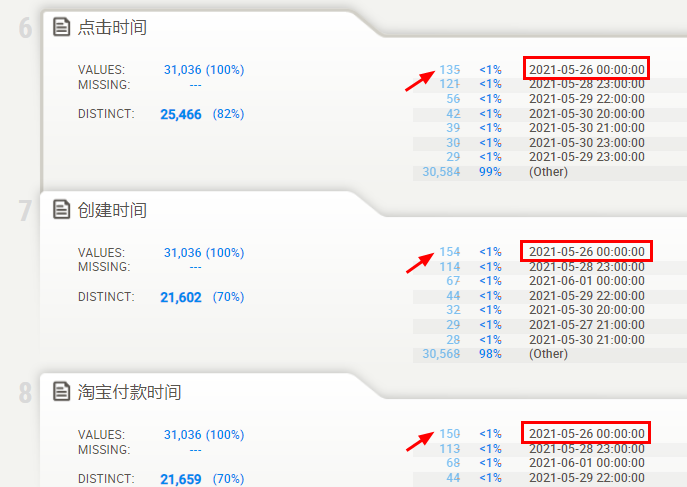

In [921]:
Image("images/eda洞察1.PNG", width = 500)

##### **1）基于用户行为路径的理解，一条正常的用户行为路径数据记录中，【点击时间】、【创建时间】、【淘宝付款时间】这几个字段之间，必存在时间差，但原始数据中这三个阶段的数据均为相同的时间戳，存在大量重复值，且类似情况出现在多个日期内，这一部分可能是异常值，在后面的分析中需要重点关注。**

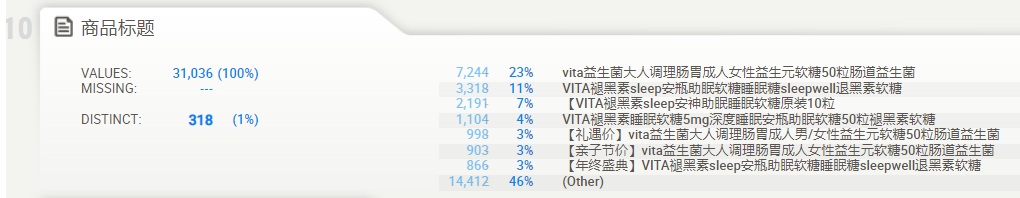

In [922]:
Image("images/eda洞察2.PNG", width = 600)

##### **2）从基础数据统计中，我们可以大致看出益生菌和睡眠类商品销量较好，在此现有一个基本的认知，待后续分析进一步验证。**

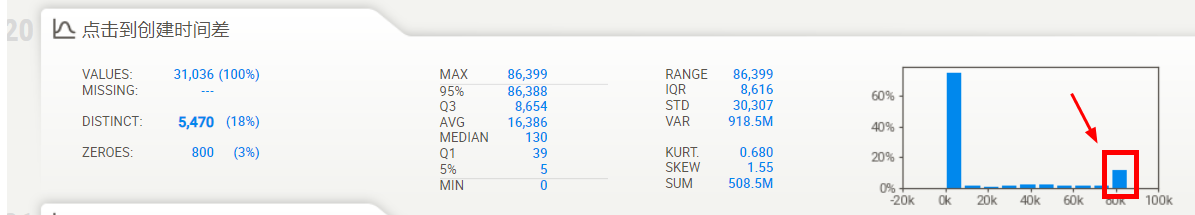

In [923]:
Image("images/eda洞察3.PNG", width = 600)

##### **3）绝大部分【点击到创建时间差】集中于较短的时间区间内，但数据尾部存在【大量极大值】，这部分可能也是异常数据，且和先前发现的异常数据之间可能存在关联，后续分析需要持续关注。**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
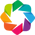


同时选中Pan和Wheel Zoom，可实现拖拽+滚动缩放



:Histogram   [x]   (Frequency)

In [924]:
# 查看点击到创建时间差数据分布

# !pip install HoloViews
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

data = df['点击到创建时间差']

print('\n同时选中Pan和Wheel Zoom，可实现拖拽+滚动缩放\n')
frequencies, time = np.histogram(data, 60)
hv.Histogram((time, frequencies)).opts(xlabel = '时间(秒)', 
                                        ylabel='计数', 
                                        fontscale = 1, 
                                        width = 400, 
                                        height = 400, 
                                        title = '点击到创建时间差')


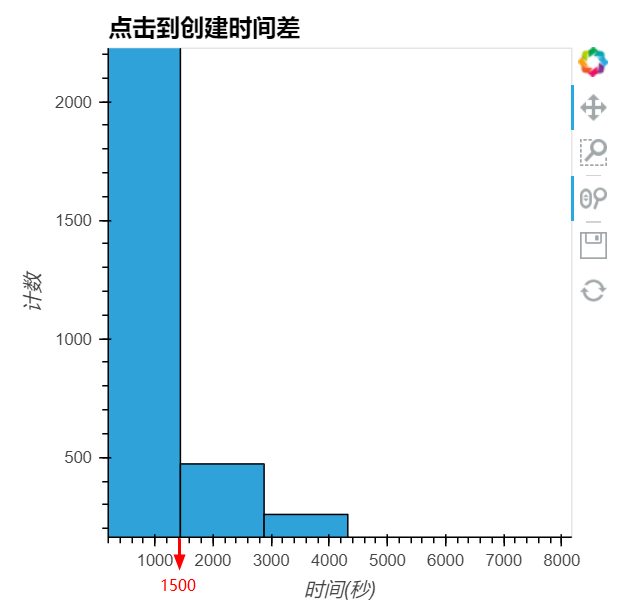

In [925]:
Image("images/拖拽缩放1.PNG", width = 400)

**绝大部分消费者（约22000条数据）在看到广告，点击跳转到商品页面后，如果最终决定购买，都会在1500秒内创建订单;**

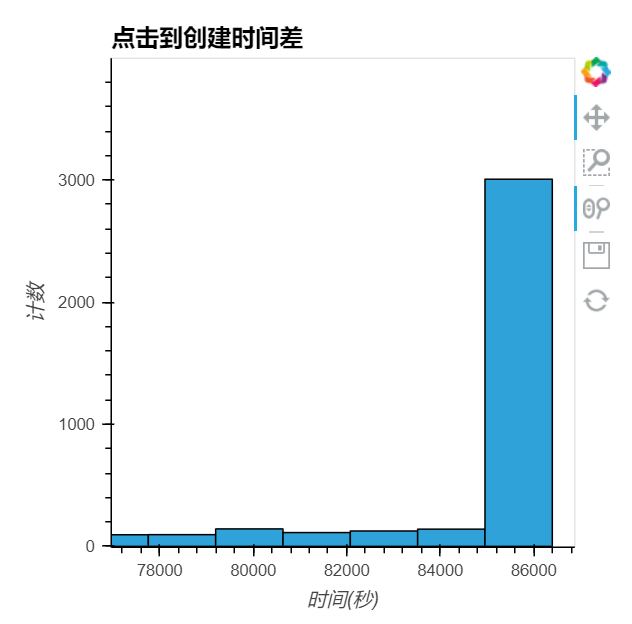

In [926]:
Image("images/拖拽缩放2.PNG", width = 400)

##### **有一部分消费者（约3000条数据）的点击-创建时间差达到86000秒（约等于24小时），这部分数据可能是异常值，需要进一步深入探索。**

In [927]:
df.loc[df['点击到创建时间差'] >= 86000]

淘宝订单编号           商品ID                             淘宝子订单号  \
37    8066768158222596115  8391485512245  8066768158222596115-8391485512245   
38    8065473379256765946  8391485512245  8065473379256765946-8391485512245   
47    8068866056806763213  8391485512245  8068866056806763213-8391485512245   
64    8068891257149725332  8391485512245  8068891257149725332-8391485512245   
141   7898873359902153677  8406711827254  7898873359902153677-8406711827254   
...                   ...            ...                                ...   
8022  8463929082813508139  8406736482903  8463929082813508139-8406736482903   
8023  8463929082813508139  8415498144485  8463929082813508139-8415498144485   
8026  8465846877758543074  8406736482903  8465846877758543074-8406736482903   
8027  8465846877758543074  8415498144485  8465846877758543074-8415498144485   
8073  7967180433274637265  8406736482903  7967180433274637265-8406736482903   

           点击月份       点击日期                点击时间                创建时间  \
37   2020-11-01 2020-11-29 2020-11-29 05:18:15 2020-11-29 05:18:00   
38   2020-11-01 2020-11-29 2020-11-29 05:11:01 2020-11-29 05:11:00   
47   2020-11-01 2020-11-30 2020-11-30 01:29:07 2020-11-30 01:29:00   
64   2020-11-01 2020-11-30 2020-11-30 04:23:18 2020-11-30 04:23:00   
141  2020-11-01 2020-11-24 2020-11-24 01:57:51 2020-12-02 01:54:00   
...         ...        ...                 ...                 ...   
8022 2021-05-01 2021-05-15 2021-05-15 21:02:01 2021-05-15 21:02:00   
8023 2021-05-01 2021-05-15 2021-05-15 21:02:01 2021-05-15 21:02:00   
8026 2021-05-01 2021-05-15 2021-05-15 21:14:06 2021-05-15 21:14:00   
8027 2021-05-01 2021-05-15 2021-05-15 21:14:06 2021-05-15 21:14:00   
8073 2021-05-01 2021-05-15 2021-05-15 21:50:12 2021-05-15 21:50:00   

                  淘宝付款时间                付款时间  \
37   2020-11-29 05:18:00 2020-11-29 05:18:58   
38   2020-11-29 05:11:00 2020-11-29 05:12:08   
47   2020-11-30 01:29:00 2020-11-30 01:29:47   
64   2020-11-30 04:23:00 2020-11-30 04:23:57   
141  2020-12-02 01:54:00 2020-12-02 01:54:27   
...                  ...                 ...   
8022 2021-05-15 21:03:00 2021-05-15 21:03:21   
8023 2021-05-15 21:03:00 2021-05-15 21:03:21   
8026 2021-05-15 21:14:00 2021-05-15 21:14:59   
8027 2021-05-15 21:14:00 2021-05-15 21:14:59   
8073 2021-05-15 21:50:00 2021-05-15 21:50:53   

                                          商品标题  ... 订单状态    付款金额  订单类型  \
37    【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...  已付款   93.12   聚划算   
38    【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...  已付款   89.36   聚划算   
47    【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...  已付款   87.56   聚划算   
64    【火拼价】VITA褪黑素sleep安瓶助眠软糖睡眠糖sleepwell退黑素软糖  ...  已付款   92.50   聚划算   
141                  VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...  已付款   25.73    天猫   
...                                        ...  ...  ...     ...   ...   
8022                【VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...  已付款    0.00    天猫   
8023            vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  169.66    天猫   
8026                【VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...  已付款    0.00    天猫   
8027            vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  169.89    天猫   
8073                【VITA褪黑素sleep安神助眠睡眠软糖原装10粒  ...  已付款    0.00    天猫   

               推广位ID      推广位名称 成交平台  点击到创建时间差 创建到付款时间差 淘宝付款到付款时间差  点击到付款时间差  
37    18999721388976  VsleepI31   无线     86385       58         58        43  
38    18999721388976  VsleepI31   无线     86399       68         68        67  
47    18999721388976  VsleepI31   无线     86393       47         47        40  
64    18999721388976  VsleepI31   无线     86382       57         57        39  
141   18999725389323  VsleepI39   无线     86169       27         27     86196  
...              ...        ...  ...       ...      ...        ...       ...  
8022  19000066489027   VproI522   无线     86399       81         21        80  
8023  19000066489027   VproI522   无线     86399       81         21        80  
8026  19000065589053   VproI524   无线     86394      

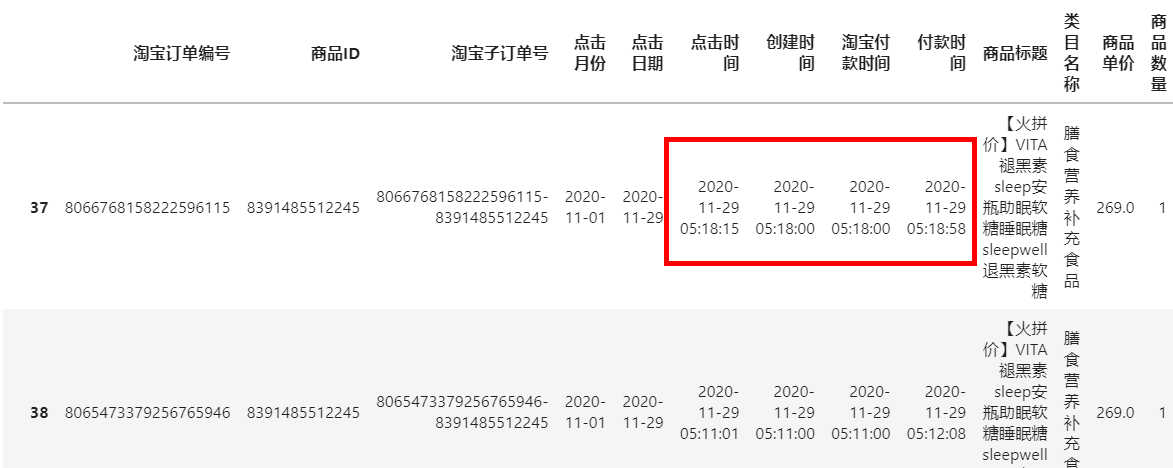

In [928]:
Image("images/异常数据1.PNG", width = 700)

##### —————————————————————————————————————————————————
##### 基于用户路径和先前分析，我们可以发现以下异常点：
##### 1、【创建时间】和【淘宝付款时间】存在秒级数据缺失的情况；
##### 2、上述情况进一步导致了【创建时间】早于【点击时间】的情况，明显不符合业务逻辑。

##### 让我们进一步查看这四个和用户行为联系最紧密的字段，查看是否有异常值。
##### —————————————————————————————————————————————————

In [929]:
df['点击时间'].value_counts()

2021-05-26 00:00:00    135
2021-05-28 23:00:00    121
2021-05-29 22:00:00     56
2021-05-30 20:00:00     42
2021-05-30 21:00:00     39
                      ... 
2020-12-27 01:36:21      1
2021-01-22 19:47:43      1
2021-04-15 20:21:38      1
2021-01-08 00:18:12      1
2020-12-16 17:55:09      1
Name: 点击时间, Length: 25466, dtype: int64

In [930]:
df['创建时间'].value_counts()

2021-05-26 00:00:00    154
2021-05-28 23:00:00    114
2021-06-01 00:00:00     67
2021-05-29 22:00:00     44
2021-05-30 20:00:00     32
                      ... 
2021-01-19 05:55:00      1
2021-03-12 23:34:00      1
2020-12-31 02:33:00      1
2021-01-28 04:55:00      1
2021-05-22 23:34:00      1
Name: 创建时间, Length: 21602, dtype: int64

In [931]:
df['付款时间'].value_counts()

2021-05-26 00:00:00    150
2021-05-28 23:00:00    113
2021-06-01 00:00:00     67
2021-05-29 22:00:00     44
2021-05-30 20:00:00     32
                      ... 
2020-12-22 11:42:16      1
2021-04-24 23:28:43      1
2021-02-15 22:05:42      1
2020-12-15 09:52:50      1
2021-01-12 01:31:14      1
Name: 付款时间, Length: 26746, dtype: int64

In [932]:
df['淘宝付款时间'].value_counts()

2021-05-26 00:00:00    150
2021-05-28 23:00:00    113
2021-06-01 00:00:00     68
2021-05-29 22:00:00     44
2021-05-30 20:00:00     32
                      ... 
2021-04-14 01:24:00      1
2021-02-16 18:15:00      1
2021-04-06 00:24:00      1
2021-01-31 05:17:00      1
2021-05-22 23:34:00      1
Name: 淘宝付款时间, Length: 21659, dtype: int64

##### —————————————————————————————————————————————————
##### 我们再次验证了以上四个字段的频数统计中，有众多记录的数据【完全一致】，其中【2021-05-26 00:00:00】出现了近150次。
##### **那么，这些异常值是如何产生的呢？**
##### **这里，我们做出三个假设并一一进行检验：**
##### 假设1：用户参加秒杀活动，导致四个字段的时间重叠；
##### 假设2：机器人脚本抢购；
##### 假设3：在数据统计时，因为某种技术原因而产生的数据转换异常；
##### —————————————————————————————————————————————————

#### 验证假设1

In [933]:
df.loc[df['点击时间'] == "2021-05-26 00:00:00"]

淘宝订单编号           商品ID                             淘宝子订单号  \
4235  7975837244253642647  8415498144485  7975837244253642647-8415498144485   
4236  8490226867250605630  8415498144485  8490226867250605630-8415498144485   
4241  7975514503697283659  8415498144485  7975514503697283659-8415498144485   
4242  7974692011084938164  8415498144485  7974692011084938164-8415498144485   
4243  7975307136835915031  8415498144485  7975307136835915031-8415498144485   
...                   ...            ...                                ...   
4379  8491439959080941100  8405311359843  8491439959080941100-8405311359843   
4380  8493286114444069735  8415498144485  8493286114444069735-8415498144485   
4383  7976371054649562265  8415498144485  7976371054649562265-8415498144485   
4386  8493574330340784390  8415498144485  8493574330340784390-8415498144485   
4391  8492265475302430687  8415619342630  8492265475302430687-8415619342630   

           点击月份       点击日期       点击时间       创建时间     淘宝付款时间       付款时间  \
4235 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4236 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4241 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4242 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4243 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
...         ...        ...        ...        ...        ...        ...   
4379 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4380 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4383 2021-05-01 2021-05-26 2021-05-26 2021-05-26 2021-05-26 2021-05-26   
4386 2021-05-01 2021-05-26 2021-05-26 2021-05-27 2021-05-27 2021-05-27   
4391 2021-05-01 2021-05-26 2021-05-26 2021-05-27 2021-05-27 2021-05-27   

                                            商品标题  ... 订单状态    付款金额  订单类型  \
4235        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  164.25    天猫   
4236        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  169.79    天猫   
4241        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  163.02    天猫   
4242        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  169.89    天猫   
4243        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  169.89    天猫   
...                                          ...  ...  ...     ...   ...   
4379  vita儿童复合维生素益生菌碘&amp;锌软糖+免疫力罐维生素CD3&amp;锌软糖  ...  已付款   40.00    天猫   
4380        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  169.29    天猫   
4383        【日价】vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已失效  169.89    天猫   
4386            vita益生菌大人调理肠胃成人男/女性益生元软糖50粒肠道益生菌  ...  已付款  163.02    天猫   
4391         VITA女性复合维生素ce软糖90粒+vita益生菌大人调理肠胃50粒  ...  已付款   40.00    天猫   

               推广位ID     推广位名称 成交平台  点击到创建时间差 创建到付款时间差 淘宝付款到付款时间差  点击到付款时间差  
4235  19000061439192  VproI530   无线         0        0          0         0  
4236  19000061439192  VproI530   无线         0        0          0         0  
4241  19000067838938   VproI56   无线         0        0          0         0  
4242  19000067838938   VproI56   无线         0        0          0         0  
4243  19000067838938   VproI56   无线         0        0          0         0  
...              ...       ...  ...       ...      ...        ...       ...  
4379  19000067838938   VproI56   无线         0        0          0         0  
4380  19000067838938   VproI56   无线         0        0          0         0  
4383  19000062889125   VproI55   无线         0        0          0         0  
4386  19000065539021   VproI54   无线         0        0          0         0  
4391  19000062889125   VproI55   无线         0        0          0         0  

[135 rows x 23 columns]

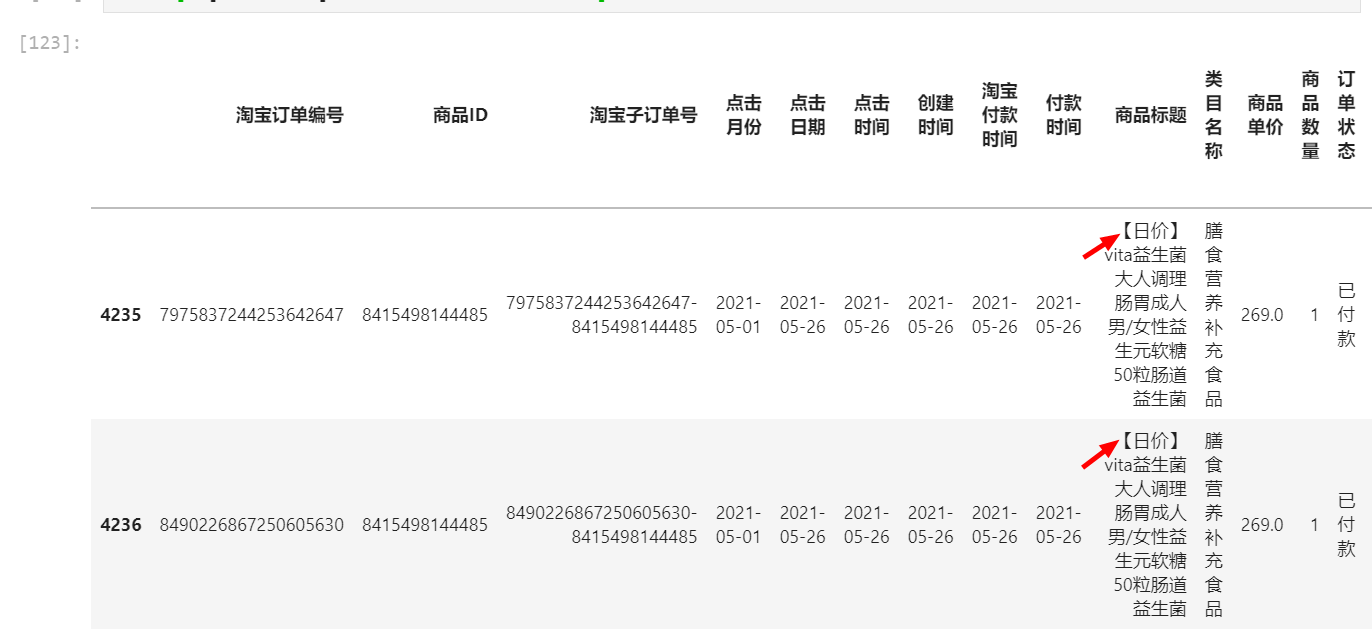

In [934]:
Image("images/异常数据2.PNG", width = 1000)


##### **可以发现，包含【2021-05-26 00:00:00】的记录中，有许多条记录的商品标题显著表明了【日价】，因此假设1不成立。**

#### 验证假设2

##### **基于大部分数据的时间统计精确到了秒级，即使是机器人脚本抢购，一条用户行为的四个阶段，只会出现时间差高度接近，但不可能完全重叠，因此假设2不成立。**

#### 验证假设3

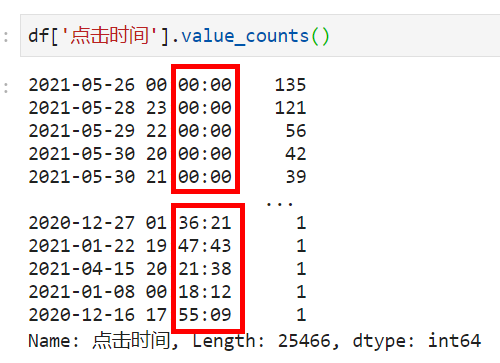

In [935]:
Image("images/异常数据3.PNG", width = 300)

##### ————————————————————————————————————————————————
##### **高度可信。**
##### **因为凡是异常的数据，几乎都只有日期数据，具体的时间数据全部缺失，因此我们认为是由于技术原因造成了异常数据。**
##### **经调查，淘宝在2021年5月26日（618预热期），对数据进行了脱敏加密（去除了分钟级、秒级的数据）。**
##### **基于业内惯例，商家往往会在大促前期，向抖音回传淘宝平台的店铺数据，从而指定更加精准的投放策略。淘宝为了和商家此类行为形成对冲，同时避免平台数据外泄，因此人为降低了数据精度。**
##### ————————————————————————————————————————————————

In [936]:
# 查看异常数据
df1 = pd.DataFrame(df['创建时间'].value_counts())
df1[df1['创建时间'] > 1].head(50)

创建时间
2021-05-26 00:00:00   154
2021-05-28 23:00:00   114
2021-06-01 00:00:00    67
2021-05-29 22:00:00    44
2021-05-30 20:00:00    32
2021-05-27 21:00:00    29
2021-05-30 21:00:00    28
2021-05-29 23:00:00    22
2021-05-27 22:00:00    22
2021-05-28 22:00:00    20
2021-05-30 23:00:00    20
2021-05-29 20:00:00    14
2021-05-29 00:00:00    14
2021-05-29 21:00:00    13
2021-06-01 08:00:00    13
2021-05-16 20:31:00    12
2021-05-16 20:10:00    12
2021-05-16 19:40:00    12
2020-12-10 00:06:00    11
2021-05-16 20:12:00    11
2020-12-10 00:44:00    11
2021-06-01 07:00:00    11
2021-06-01 10:00:00    10
2021-05-27 00:00:00    10
2021-05-16 19:43:00    10
2021-05-28 00:00:00    10
2021-05-30 22:00:00    10
2021-05-11 22:57:00    10
2021-05-11 23:09:00    10
2021-06-01 06:00:00    10
2021-05-11 23:04:00    10
2021-05-11 22:58:00    10
2021-05-31 00:00:00     9
2021-05-27 20:00:00     9
2020-12-10 00:27:00     9
2020-12-10 00:05:00     9
2021-05-20 23:26:00     9
2021-04-20 22:21:00     8
2021-06-01 11:00:00     8
2021-05-11 00:25:00     8
2021-05-10 22:38:00     8
2021-06-01 01:00:00     8
2021-05-08 20:08:00     8
2021-05-13 20:09:00     8
2021-06-02 20:00:00     8
2021-04-28 20:04:00     8
2021-05-14 19:42:00     8
2021-01-21 01:53:00     8
2020-12-15 00:59:00     8
2021-04-28 20:05:00     8

##### **我们可以谨慎判断，2021年5月26日后的部分数据存在异常，后续根据需要进行筛选或去除。**

In [937]:
# 保存合并后的数据文件
df.to_excel('淘宝订单合并版.xlsx')

##### **接下来，我们将基于业务理解，提出各种业务问题，并尝试通过SQL查询及数据可视化来回答问题：**

#### &emsp;1.&emsp;**广告投放渠道分析**
##### &emsp;&emsp;1.1&emsp;哪些广告投放渠道更好？（高GMV、低决策时间）
##### &emsp;&emsp;1.2&emsp;对于优质投放渠道，它们具有哪些特征？
#### &emsp;2.&emsp;**商品分析**
##### &emsp;&emsp;2.1&emsp;哪些品类销售情况更好？（高GMV、低决策时间）
##### &emsp;&emsp;2.2&emsp;哪些品类销售情况较差？（高退款率、低GMV）
##### &emsp;&emsp;2.3&emsp;哪些品类的支付页面可能有问题？
#### &emsp;3.&emsp;**用户行为洞察**
##### &emsp;&emsp;3.1&emsp;用户更倾向于移动端还是电脑端下单？
##### &emsp;&emsp;3.2&emsp;成交用户一般会在点入商品界面后多少时间内下单？
##### &emsp;&emsp;3.3&emsp;对于各个商品品类，用户一般会在一天中的哪些时间段下单？

In [938]:
# 连接数据库，准备进行SQL查询
import pymysql

In [939]:
conn = pymysql.connect(
                        host = 'localhost',
                        port = 3306,
                        user = 'root',
                        database = 'interest-e-commerce',
                        password = 'yqjsw17945',
                        charset = 'utf8'
)

conn

In [940]:
sql = 'SELECT * FROM sheet1;'
pd.read_sql(sql, conn).head()

f1               淘宝订单编号           商品ID                             淘宝子订单号  \
0  0  8065181419668916224  8391485512245  8065181419668915893-8391485512245   
1  1  8063912851627027456  8391485512245  8063912851627027323-8391485512245   
2  2  7892831287092672512  8406711827254  7892831287092672354-8406711827254   
3  3  8063220174922536960  8391485512245  8063220174922537133-8391485512245   
4  4  8064435682184004608  8391485512245  8064435682184005043-8391485512245   

         点击月份        点击日期                     点击时间                     创建时间  \
0  2020-11-01  2020-11-25  2020-11-25 04:25:04.000  2020-11-28 16:38:00.000   
1  2020-11-01  2020-11-28  2020-11-28 01:27:09.000  2020-11-28 13:25:00.000   
2  2020-11-01  2020-11-14  2020-11-14 05:24:24.000  2020-11-28 13:07:00.000   
3  2020-11-01  2020-11-28  2020-11-28 08:10:45.000  2020-11-28 08:14:00.000   
4  2020-11-01  2020-11-25  2020-11-25 05:35:22.000  2020-11-28 06:37:00.000   

                    淘宝付款时间                     付款时间  ... 订单状态    付款金额 订单类型  \
0  2020-11-28 16:38:00.000  2020-11-28 16:38:58.000  ...  已付款  97.563  聚划算   
1  2020-11-28 13:25:00.000  2020-11-28 13:25:35.000  ...  已付款  113.23  聚划算   
2  2020-11-28 13:07:00.000  2020-11-28 13:07:52.000  ...  已失效   45.73   天猫   
3  2020-11-28 08:14:00.000  2020-11-28 08:14:23.000  ...  已付款   93.23  聚划算   
4  2020-11-28 06:37:00.000  2020-11-28 06:38:06.000  ...  已付款   93.23  聚划算   

            推广位ID      推广位名称 成交平台 点击到创建时间差 创建到付款时间差 淘宝付款到付款时间差 点击到付款时间差  
0  18999721388976  VsleepI31   无线    43976       58         58    44034  
1  18999721388976  VsleepI31   无线    43071       35         35    43106  
2  18999721388976  VsleepI31   无线    27756       52         52    27808  
3  18999725939298  VsleepI38   无线      195       23         23      218  
4  18999721388976  VsleepI31   无线     3698       66         66     3764  

[5 rows x 24 columns]

#### 1.&emsp;**广告投放渠道分析**
##### 1.1&emsp;哪些广告投放渠道更好？（高GMV、低决策时间）

##### 1）GMV排名前十的推广位有哪些？

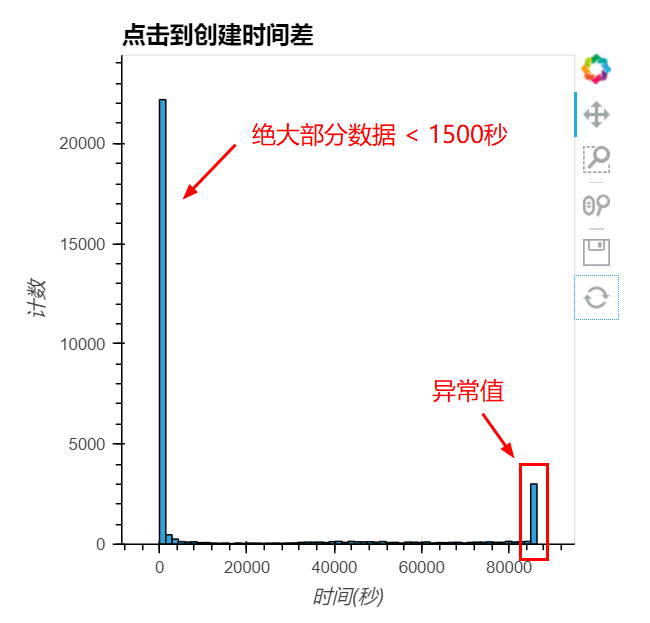

In [941]:
Image("images/异常数据4.PNG", width = 400)

##### **在先前分析中，我们知道了在大部分成交订单中，用户都会在1500秒内创建订单，尾部的数据是由于技术错误而产生的异常值，这里我们通过筛选【点击到创建时间差】字段排除掉异常值。**

In [942]:
sql = '''
       
       SELECT 
           推广位名称, 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 推广位名称 
       ORDER BY 2 DESC 
       LIMIT 10;

       '''

print('=' * 50)
print('高GMV推广位排名（总）')
print('=' * 50)
pd.read_sql(sql, conn)

高GMV推广位排名（总）


推广位名称        GMV
0    VproI56  208538.90
1   VproI524  177947.87
2   VproI526  163677.52
3  VesleepI1  147434.74
4  VsleepI31  120753.90
5   VproI555  116569.44
6   VproI525  114956.77
7    VproI53  105515.43
8   VproI514  104030.55
9   TsleepI6  100462.83

In [943]:
sql = ''' 

       SELECT 
           推广位名称, 
           ROUND(SUM(付款金额),2) 'GMV' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
             AND
             DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
       GROUP BY 推广位名称
       ORDER BY 2 DESC
       LIMIT 10

        '''

print('=' * 50)
print('高GMV推广位排名（近一个月）')
print('=' * 50)
pd.read_sql(sql, conn)


高GMV推广位排名（近一个月）


推广位名称        GMV
0  VproI524  176955.53
1  VproI526   80845.72
2  VproI522   80807.57
3  VproI555   60685.20
4   VproI54   43643.40
5  VproI556   35525.57
6   VproI56   32909.97
7  VproI525   30703.27
8  VproI529   26145.45
9  VproI520   22601.19

In [944]:
sql = ''' 
       WITH a AS (
       SELECT 
           推广位名称, 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 推广位名称 
       ORDER BY 2 DESC 
       LIMIT 10
       ),
       
       b AS (
       SELECT 
           推广位名称, 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
             AND
             DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
       GROUP BY 推广位名称
       ORDER BY 2 DESC
       LIMIT 10
       )
       
       SELECT
           a.推广位名称 '值得关注的高GMV推广位'
       FROM a 
       JOIN b USING(推广位名称);
       
        '''

print('=' * 50)
print('值得关注的高GMV推广位')
print('=' * 50)
pd.read_sql(sql, conn)

值得关注的高GMV推广位


值得关注的高GMV推广位
0     VproI524
1     VproI526
2     VproI555
3      VproI56
4     VproI525

##### GMV排名前十的推广位：
##### VproI56、VproI524、VproI526、VesleepI1、VsleepI31、VproI555、VproI525、VproI53、VproI514、TsleepI6;
##### 最近一个月GMV排名前十的推广位：
##### VproI524、VproI526、VproI522、VproI555、VproI54、VproI556、VproI56、VproI525、VproI529、VproI520;

##### 值得重点关注的推广位：
##### VproI524、VproI526、VproI555、VproI56、VproI525

##### 这五个推广位在整个数据统计时间区间内GMV表现良好，且近一个月依旧维持在较高水平，值得重点关注；

##### 2）决策时间最低的前十位推广位是哪些？

In [945]:
sql = '''

      SELECT 
          推广位名称, 
          ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
      FROM sheet1
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 推广位名称 
      ORDER BY 2 
      LIMIT 10;
      
      '''

print('=' * 50)
print('平均决策时间排名（总）')
print('=' * 50)
pd.read_sql(sql, conn)


平均决策时间排名（总）


推广位名称  平均决策时间（秒）
0   VsleepI12        0.0
1   VsleepI26        3.5
2   TsleepI40       10.0
3   VsleepI58       13.0
4   VsleepI27       15.0
5    VproI571       16.0
6    VproI510       20.0
7      VproI9       22.0
8  VesleepI16       25.0
9    JsleepI1       26.0

In [946]:
sql = '''

      SELECT 
          推广位名称, 
          ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
      FROM sheet1 
      WHERE DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
            AND
            点击到创建时间差 <= 1500
      GROUP BY 推广位名称 
      ORDER BY 2 
      LIMIT 10;
      
      '''

print('=' * 50)
print('平均决策时间排名（近一个月）')
print('=' * 50)
pd.read_sql(sql, conn)


平均决策时间排名（近一个月）


推广位名称  平均决策时间（秒）
0   VproI518       0.00
1  VsleepI12       0.00
2   VproI571      16.00
3   VproI582      36.40
4   VproI579      71.50
5   VproI512      73.07
6   VsleepI1      80.58
7   VproI544      84.05
8   VproI583      88.65
9   VproI581      97.33

In [947]:
sql = '''
       SELECT 
           推广位名称, 
           ROUND(AVG(点击到付款时间差), 2) '平均成交时长（秒）' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 推广位名称 
       ORDER BY 2 
       LIMIT 10;

       '''

print('=' * 50)
print('平均成交时长排名')
print('=' * 50)
pd.read_sql(sql, conn)


平均成交时长排名


推广位名称  平均成交时长（秒）
0   VsleepI12        0.0
1      VproI9       27.0
2    VproI571       46.0
3  VesleepI16       46.0
4    JsleepI1       47.0
5   TsleepI40       47.5
6    VsleepI8       49.0
7   VsleepI27       53.0
8   VsleepI58       53.0
9     VproI12       53.0

In [948]:
sql = ''' 
       WITH a AS (
       SELECT 
           推广位名称, 
           ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
       FROM sheet1
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 推广位名称 
       ORDER BY 2 
       LIMIT 10
       ),
       
       b AS (
      SELECT 
          推广位名称, 
          ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
      FROM sheet1 
      WHERE DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
            AND
            点击到创建时间差 <= 1500
      GROUP BY 推广位名称 
      ORDER BY 2 
      LIMIT 10
       ),
       
       c AS (
       SELECT 
           推广位名称, 
           ROUND(AVG(点击到付款时间差), 2) '平均成交时长排名' 
       FROM sheet1 
       GROUP BY 推广位名称 
       ORDER BY 2 
       LIMIT 10
       )
       
       SELECT
           a.推广位名称 '值得关注的低决策时间推广位'
       FROM a 
       JOIN b USING(推广位名称)
       JOIN c USING(推广位名称)
       ;
        '''

print('=' * 50)
print('值得关注的低决策时间推广位')
pd.read_sql(sql, conn)

值得关注的低决策时间推广位


值得关注的低决策时间推广位
0     VsleepI12
1      VproI571

##### 决策时间排名前十的推广位：
##### VsleepI12、VsleepI26、TsleepI40、VsleepI58、VsleepI27、VproI571、VproI510、VproI9、VesleepI16、JsleepI1；
##### 最近一个月决策时间排名前十的推广位：
##### VproI518、VsleepI12、VproI571、VproI582、VproI579、VproI512、VsleepI1、VproI544、VproI583、VproI581；

##### 值得重点关注的推广位：
##### VproI571

##### 该推广位在整个数据统计时间区间和近一个月，均保持着较低的决策时间（点击-创建时间差、点击-付款时间差）；
##### 通过该推广位成交的用户从点击，决策购买，到支付完成用时较少；
##### 查询结果中的VsleepI12的决策时间为0，很明显是一个异常值，因此予以排除。


=======================================================================
##### 至此，我们认为，较为优质的投放渠道有6个，它们是：
##### &emsp;&emsp;VproI524、VproI526、VproI555、VproI56、VproI525、VproI571
##### 其中，VproI524、VproI526、VproI555、VproI56、VproI525具有较好的GMV转化能力,
##### VproI571页面下的商品决策时间较低。
=======================================================================

##### 1.2&emsp;对于优质投放渠道，它们具有哪些特征？

In [949]:
channel_list = ['VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525', 'VproI571']

df_channel = df[df['推广位名称'].isin(channel_list)]
df_channel.head()

淘宝订单编号           商品ID                             淘宝子订单号  \
0    8374185871546079585  8415498144485  8374185871546079585-8415498144485   
151  7936081509131616263  8415498144485  7936081509131616263-8415498144485   
312  8334494000945806332  8415498144485  8334494000945806332-8415498144485   
316  7931633779312837654  8400562332581  7931633779312837654-8400562332581   
321  8333229894972181314  8415498144485  8333229894972181314-8415498144485   

          点击月份       点击日期                点击时间                创建时间  \
0   2021-03-01 2021-03-30 2021-03-30 22:16:25 2021-04-08 20:24:00   
151 2021-03-01 2021-03-31 2021-03-31 00:13:56 2021-04-02 09:39:00   
312 2021-03-01 2021-03-23 2021-03-23 22:09:22 2021-03-23 22:09:00   
316 2021-03-01 2021-03-23 2021-03-23 22:15:16 2021-03-23 22:17:00   
321 2021-03-01 2021-03-23 2021-03-23 22:24:24 2021-03-23 22:25:00   

                 淘宝付款时间                付款时间  \
0   2021-04-08 20:24:00 2021-04-08 20:24:49   
151 2021-04-02 09:39:00 2021-04-02 09:39:22   
312 2021-03-23 22:09:00 2021-03-23 22:10:00   
316 2021-03-23 22:17:00 2021-03-23 22:17:19   
321 2021-03-23 22:25:00 2021-03-23 22:25:46   

                                      商品标题  ... 订单状态    付款金额  订单类型  \
0    【健康狂欢价】vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  199.89    天猫   
151         vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  169.74    天猫   
312         vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  167.57    天猫   
316         vita益生菌大人调理肠胃成人女性益生元软糖30粒肠道益生菌  ...  已付款  145.29    天猫   
321         vita益生菌大人调理肠胃成人女性益生元软糖50粒肠道益生菌  ...  已付款  163.02    天猫   

              推广位ID    推广位名称 成交平台  点击到创建时间差 创建到付款时间差 淘宝付款到付款时间差  点击到付款时间差  
0    19000067838938  VproI56   无线     79655       49         49     79704  
151  19000067838938  VproI56   无线     33904       22         22     33926  
312  19000067838938  VproI56   无线     86378       60         60        38  
316  19000067838938  VproI56   无线       104       19         19       123  
321  19000067838938  VproI56   无线        36       46         46        82  

[5 rows x 23 columns]

In [950]:
# 查看过滤是否成功
df_channel['推广位名称'].value_counts()

VproI56     1870
VproI524    1702
VproI526    1516
VproI525    1069
VproI555    1028
VproI571       1
Name: 推广位名称, dtype: int64

##### **我们发现VproI571仅有一条记录，数据量太少，因此在后续分析中不再考虑。**

In [951]:
# 重新确定重点关注推广位列表
channel_list = ['VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525']

df_channel = df[df['推广位名称'].isin(channel_list)]

df_channel['推广位名称'].value_counts()

VproI56     1870
VproI524    1702
VproI526    1516
VproI525    1069
VproI555    1028
Name: 推广位名称, dtype: int64

In [952]:
# 查询重点推广位单均价格和平均成交时长

sql = '''
       SELECT 
           ROUND(AVG(付款金额), 2) '单均价格（元）',
           ROUND(AVG(点击到付款时间差), 2) '平均成交时长（秒）' 
       FROM sheet1
       WHERE 推广位名称 IN ('VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525')
             AND
             点击到创建时间差 <= 1500;

       '''

print('=' * 50)
print('重点推广位单均价格 & 平均成交时长')
print('=' * 50)
pd.read_sql(sql, conn)


重点推广位单均价格 & 平均成交时长


单均价格（元）  平均成交时长（秒）
0   143.88     427.54

##### **重点推广位的单均价格为143.88元，平均成交时长为427.54秒（约7分钟）。**

In [953]:
# 查询重点推广位主要成交流量入口

sql = '''
       WITH t AS (
       SELECT 
           *
       FROM sheet1
       WHERE 推广位名称 IN ('VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525')
             AND
             点击到创建时间差 <= 1500
       )
       
       SELECT
           推广位名称,
           订单类型,
           排名
       FROM (
              SELECT
                   推广位名称,
                   订单类型,
                   RANK() OVER(PARTITION BY 推广位名称 ORDER BY COUNT(*) DESC) '排名'
              FROM t
              GROUP BY 推广位名称, 订单类型
              ORDER BY 2 DESC) t1
        ORDER BY 1, 2, 3
       '''

print('=' * 50)
print('重点推广位主要成交流量入口')
print('=' * 50)
pd.read_sql(sql, conn)


重点推广位主要成交流量入口


推广位名称 订单类型  排名
0  VproI524   天猫   1
1  VproI524  聚划算   2
2  VproI525   天猫   1
3  VproI525  聚划算   2
4  VproI526   天猫   1
5  VproI526  聚划算   2
6  VproI555   天猫   1
7  VproI555  聚划算   2
8   VproI56   天猫   1
9   VproI56  聚划算   2

In [954]:
# 查询重点推广位主要成交流量入口比例

sql = '''
       WITH t AS (
       SELECT 
           *
       FROM sheet1
       WHERE 推广位名称 IN ('VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525')
             AND
             点击到创建时间差 <= 1500
       )
       
       SELECT
           订单类型,
           CONCAT(ROUND(COUNT(*) / (SELECT COUNT(*) FROM t) * 100, 2), '%') '类型占比（%）'
       FROM t
       GROUP BY 订单类型
       ORDER BY 1, 2 DESC
       '''

print('=' * 50)
print('重点推广位主要成交流量入口比例')
print('=' * 50)
pd.read_sql(sql, conn)

重点推广位主要成交流量入口比例


订单类型 类型占比（%）
0   天猫  91.20%
1  聚划算   8.80%

##### **重点推广位91.20%的订单经由天猫店铺入口直接产生。**

In [955]:
# 查询重点推广位主要成交商品品类

sql = '''
       WITH t AS (
       SELECT 
           *
       FROM sheet1
       WHERE 推广位名称 IN ('VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525')
             AND
             点击到创建时间差 <= 1500
       )
       
       SELECT
           推广位名称,
           商品品类,
           销量排名
       FROM (
               SELECT
                   推广位名称,
                   一级标签 '商品品类',
                   DENSE_RANK() OVER(PARTITION BY 推广位名称 ORDER BY COUNT(一级标签) DESC) '销量排名'
               FROM t
               LEFT JOIN sku_label USING(商品ID)
               GROUP BY 推广位名称, 一级标签
               ORDER BY 1, 3 DESC) t1
        WHERE 销量排名 <= 3
        ORDER BY 1, 3
        
       '''

print('=' * 50)
print('重点推广位主要成交商品品类')
print('=' * 50)
pd.read_sql(sql, conn)

重点推广位主要成交商品品类


推广位名称   商品品类  销量排名
0   VproI524    益生菌     1
1   VproI524     睡眠     2
2   VproI524  儿童维生素     3
3   VproI525    益生菌     1
4   VproI525     睡眠     2
5   VproI525  女士维生素     3
6   VproI526    益生菌     1
7   VproI526     睡眠     2
8   VproI526  儿童维生素     3
9   VproI555    益生菌     1
10  VproI555     睡眠     2
11  VproI555  女士维生素     3
12   VproI56    益生菌     1
13   VproI56     睡眠     2
14   VproI56  女士维生素     3

In [956]:
# 查询重点推广位主要成交商品品类比例

sql = '''

       WITH t AS (
       SELECT 
           *
       FROM sheet1
       WHERE 推广位名称 IN ('VproI524', 'VproI526', 'VproI555', 'VproI56', 'VproI525')
             AND
             点击到创建时间差 <= 1500
       )
       
       SELECT
           商品品类,
           CONCAT(ROUND(COUNT(*) / SUM(COUNT(*)) OVER () * 100, 2), '%') '品类占比（%）'
       FROM (
       SELECT
           推广位名称,
           商品品类,
           销量排名,
           total
       FROM (
               SELECT
                   推广位名称,
                   一级标签 '商品品类',
                   COUNT(*) total,
                   DENSE_RANK() OVER(PARTITION BY 推广位名称 ORDER BY COUNT(一级标签) DESC) '销量排名'
               FROM t
               LEFT JOIN sku_label USING(商品ID)
               GROUP BY 推广位名称, 一级标签
               ORDER BY 1, 3 DESC) t1
        WHERE 销量排名 <= 3
        ORDER BY 1, 3) t2
        GROUP BY 商品品类
        ORDER BY 2 DESC
        
       '''

print('=' * 50)
print('重点推广位主要成交商品品类')
print('=' * 50)
pd.read_sql(sql, conn)

重点推广位主要成交商品品类


商品品类 品类占比（%）
0    益生菌  33.33%
1     睡眠  33.33%
2  女士维生素  20.00%
3  儿童维生素  13.33%

##### 在重点推广位中，最畅销的商品为：
##### **【益生菌】、【女士维生素】、【儿童维生素】以及【睡眠】产品。**
##### **其中【益生菌】和【睡眠】产品最为畅销。**

#### 至此，我们完成了广告投放渠道的分析。我们认为：

#### <font color='green'>**（1）当前较为优质的广告投放推广位有5个（VproI524、VproI526、VproI555、VproI56、VproI525），具备较好的GMV转化能力；**</font>

#### <font color='green'>**（2）91%的订单经由天猫店铺入口直接产生，单均价格达144元，平均成交时长约7分钟；**</font>

#### <font color='green'>**（3）在这些推广位下销售最好的商品品类为【益生菌】、【女士维生素】、【儿童维生素】以及【睡眠】产品，其中【益生菌】和【睡眠】产品最为畅销。**</font>




#### 2.&emsp;**商品分析**
##### 2.1&emsp;哪些品类销售情况更好？（高GMV、低决策时间）

##### 1)&emsp;哪些品类具有较高的GMV？

In [957]:
sql = '''
       
       SELECT 
           一级标签 '商品品类', 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 一级标签
       ORDER BY 2 DESC 
       LIMIT 10;

       '''

print('=' * 50)
print('高GMV商品品类排名（总）')
print('=' * 50)
pd.read_sql(sql, conn)

高GMV商品品类排名（总）


商品品类          GMV
0     益生菌  29578541.94
1      睡眠  16284505.20
2      舒压   2104409.09
3   女士维生素    566869.84
4      美容    209871.15
5   通用维生素    126296.45
6   儿童维生素    106885.68
7     专注力     39156.57
8   男士维生素     32345.53
9  专注力+其它     15348.12

In [958]:
sql = '''
       
       SELECT 
           一级标签 '商品品类', 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
             AND
             DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
       GROUP BY 一级标签
       ORDER BY 2 DESC 
       LIMIT 10;

       '''

print('=' * 50)
print('高GMV商品品类排名（近一个月）')
print('=' * 50)
pd.read_sql(sql, conn)

高GMV商品品类排名（近一个月）


商品品类          GMV
0       益生菌  11452348.77
1        睡眠    228614.49
2     女士维生素     37787.85
3     儿童维生素     32579.14
4     通用维生素     28757.88
5     男士维生素      9609.39
6        美容      8970.28
7        舒压      8362.98
8     睡眠+其它      4640.62
9  女士维生素+其它      1362.52

##### **和广告投放渠道分析结果类似，【益生菌】和【睡眠】产品依旧是销售情况最好的品类。**

##### 2)&emsp;哪些品类具有较低的决策时间？

In [959]:
sql = '''

      SELECT 
          一级标签 '商品品类', 
          ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 一级标签
      ORDER BY 2 
      LIMIT 10;
      
      '''

print('=' * 50)
print('品类平均决策时间排名（总）')
print('=' * 50)
pd.read_sql(sql, conn)

品类平均决策时间排名（总）


商品品类  平均决策时间（秒）
0  女士维生素+其它     106.00
1       益生菌     127.59
2        睡眠     133.25
3        舒压     143.29
4     女士维生素     334.03
5     睡眠+其它     357.68
6     通用维生素     392.17
7     睡眠两瓶装     396.55
8  女士维生素两瓶装     452.00
9       专注力     473.66

In [960]:
sql = '''

      SELECT 
          一级标签 '商品品类', 
          ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
            AND
            DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
      GROUP BY 一级标签
      ORDER BY 2 
      LIMIT 10;
      
      '''

print('=' * 50)
print('品类平均决策时间排名（近一个月）')
print('=' * 50)
pd.read_sql(sql, conn)

品类平均决策时间排名（近一个月）


商品品类  平均决策时间（秒）
0     睡眠两瓶装       0.00
1  女士维生素+其它      15.00
2     睡眠+其它      45.21
3       益生菌     112.80
4        舒压     222.43
5        睡眠     226.70
6       专注力     358.00
7     儿童维生素     399.36
8     通用维生素     415.77
9     男士维生素     433.50

In [961]:
sql = '''
      SELECT 
          一级标签 '商品品类', 
          ROUND(AVG(点击到付款时间差), 2) '平均成交时长（秒）' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 商品品类
      ORDER BY 2 
      LIMIT 10;

      '''

print('=' * 50)
print('品类平均成交时长排名')
print('=' * 50)
pd.read_sql(sql, conn)

品类平均成交时长排名


商品品类  平均成交时长（秒）
0      舒压     341.29
1   通用维生素     439.61
2     益生菌     454.64
3      睡眠     491.74
4     专注力     511.11
5   女士维生素     528.97
6   儿童维生素     551.05
7      美容     731.42
8   舒压+其它     900.00
9  益生菌+其它    1275.00

In [962]:
sql = ''' 
       WITH a AS (
       SELECT 
           一级标签 '商品品类', 
           ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 一级标签
       ORDER BY 2 
       LIMIT 10
       ),
       
       b AS (
       SELECT 
           一级标签 '商品品类', 
           ROUND(AVG(点击到创建时间差), 2) '平均决策时间（秒）' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
             AND
             DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
       GROUP BY 一级标签
       ORDER BY 2 
       LIMIT 10
       ),
       
       c AS (
        SELECT 
            一级标签 '商品品类', 
            ROUND(AVG(点击到付款时间差), 2) '平均成交时长（秒）' 
        FROM sheet1
        LEFT JOIN sku_label USING(商品ID)
        WHERE 点击到创建时间差 <= 1500
        GROUP BY 商品品类
        ORDER BY 2 
        LIMIT 10
       )
       
       SELECT
           a.商品品类 '值得关注的低决策时间商品品类',
           ROUND(平均成交时长（秒）, 2) '平均成交时长（秒）'
       FROM a 
       JOIN b USING(商品品类)
       JOIN c USING(商品品类)
       ORDER BY 2;
        '''

print('=' * 50)
print('值得关注的低决策时间商品品类')
pd.read_sql(sql, conn)

值得关注的低决策时间商品品类


值得关注的低决策时间商品品类  平均成交时长（秒）
0             舒压     341.29
1          通用维生素     439.61
2            益生菌     454.64
3             睡眠     491.74
4            专注力     511.11

##### **决策时间较低的商品品类包括：**
##### **【舒压】、【通用维生素】、【益生菌】、【睡眠】、【专注力】产品；**
##### **【益生菌】和【睡眠】产品不仅销售出色，且决策时间较低，具备爆款产品的属性。**

##### 让我们来看看【益生菌】和【睡眠】的GMV情况

In [963]:

sql = '''

      SELECT
          DATE(付款时间) 日期,
          SUM(付款金额) GMV
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 一级标签 LIKE ('%益生菌')
      GROUP BY DATE(付款时间)
      
      
      '''

df_yogurt = pd.read_sql(sql, conn)
df_yogurt.head()


日期       GMV
0  2020-11-30   2005.92
1  2020-12-12  26661.42
2  2020-12-11  11389.86
3  2020-12-01   7017.66
4  2020-12-10  18518.76

In [964]:
sql = '''

      SELECT
          DATE(付款时间) 日期,
          SUM(付款金额) GMV
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 一级标签 LIKE ('%睡眠')
      GROUP BY DATE(付款时间)
      
      '''

df_sleep = pd.read_sql(sql, conn)
df_sleep.head()

日期         GMV
0  2020-11-28   44257.508
1  2020-11-29   48248.670
2  2020-11-30   90647.980
3  2020-12-04  265919.630
4  2020-12-03  402866.020

In [965]:
# 可视化GMV情况

from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=line-stack

目前无法实现的功能:

暂无
"""


(
    Line()
    .add_xaxis(xaxis_data = df_sleep['日期'])
    .add_yaxis(
        series_name = "睡眠",
        y_axis = df_sleep['GMV'],
        color = 'orange',
        linestyle_opts = opts.LineStyleOpts(width = 2),
        label_opts = opts.LabelOpts(is_show = False) # 展示数据标签
    )
    .add_yaxis(
        series_name = "益生菌",
        y_axis = df_yogurt['GMV'],
        color = 'purple',
        linestyle_opts = opts.LineStyleOpts(width = 2),
        label_opts = opts.LabelOpts(is_show = False) # 展示数据标签
    )
    .set_global_opts(title_opts = opts.TitleOpts(title = "GMV",
                                                 pos_left = 'center',
                                                 pos_top = '0%'),
                     legend_opts = opts.LegendOpts(is_show = True,
                                                   pos_left = '70%',
                                                   pos_top = '10%'),
                     xaxis_opts = opts.AxisOpts(name = '日期', 
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey'),
                                                type_ = "category", boundary_gap = False),
                     yaxis_opts = opts.AxisOpts(name = '金额（元）',
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey'),
                                                type_ = "value",
                                                axistick_opts = opts.AxisTickOpts(is_show = True),
                                                splitline_opts = opts.SplitLineOpts(is_show = False)),
                     tooltip_opts = opts.TooltipOpts(trigger = "axis") # 设置悬停展示数据触发器
    )
    .render("best_selling_gmv.html")
)

from IPython.display import IFrame
IFrame('best_selling_gmv.html', width = 1000, height = 500)

##### 【益生菌】产品在2020-12-21之后每日销量开始逐步攀升，3月份开始进入稳定期间，2021-04-11达到历史高位，近期销量有所下滑；
##### 【睡眠】类产品在2020-11-29后销量急速攀升，于双十二销量达到史高，随后销量震荡下跌，近2月销量萎靡，产品亟需迭代更新。

In [966]:
sql = '''

      SELECT
          DATE(付款时间) 日期,
          AVG(点击到付款时间差) 平均成交时间
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 一级标签 LIKE ('%益生菌')
      GROUP BY DATE(付款时间)
      
      
      '''

df_yogurt = pd.read_sql(sql, conn)

sql = '''

      SELECT
          DATE(付款时间) 日期,
          AVG(点击到付款时间差) 平均成交时间
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 一级标签 LIKE ('%睡眠')
      GROUP BY DATE(付款时间)
      
      
      '''

df_sleep = pd.read_sql(sql, conn)


In [967]:
# 可视化平均成交时间

from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.apache.org/examples/editor.html?c=line-stack

目前无法实现的功能:

暂无
"""


(
    Line()
    .add_xaxis(xaxis_data = df_sleep['日期'])
    .add_yaxis(
        series_name = "睡眠",
        y_axis = df_sleep['平均成交时间'],
        color = 'orange',
        linestyle_opts = opts.LineStyleOpts(width = 2),
        label_opts = opts.LabelOpts(is_show = False) # 展示数据标签
    )
    .add_yaxis(
        series_name = "益生菌",
        y_axis = df_yogurt['平均成交时间'],
        color = 'purple',
        linestyle_opts = opts.LineStyleOpts(width = 2),
        label_opts = opts.LabelOpts(is_show = False) # 展示数据标签
    )
    .set_global_opts(title_opts = opts.TitleOpts(title = "平均成交时间",
                                                 pos_left = 'center',
                                                 pos_top = '0%'),
                     legend_opts = opts.LegendOpts(is_show = True,
                                                   pos_left = '70%',
                                                   pos_top = '10%'),
                     xaxis_opts = opts.AxisOpts(name = '日期', 
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey'),
                                                type_ = "category", boundary_gap = False),
                     yaxis_opts = opts.AxisOpts(name = '成交用时（秒）',
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey'),
                                                type_ = "value",
                                                axistick_opts = opts.AxisTickOpts(is_show = True),
                                                splitline_opts = opts.SplitLineOpts(is_show = False)),
                     tooltip_opts = opts.TooltipOpts(trigger = "axis") # 设置悬停展示数据触发器
    )
    .render("avg_deal_time.html")
)

from IPython.display import IFrame
IFrame('avg_deal_time.html', width = 1000, height = 500)

##### 【益生菌】产品在整个统计区间内成交时间持续降低，于2021-01-04达到稳定水平；
##### 【睡眠】类产品的成交时间持续走高，较高的成交时间也是产品力不足的体现，定期更新迭代很有必要。

##### 2.2&emsp;哪些品类销售情况较差？（高退款率、低GMV）

In [968]:
sql = '''
      SELECT 
          一级标签 '商品品类', 
          CONCAT(ROUND(SUM(订单状态 = '已失效') / COUNT(*), 2), '%') '退款率'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 商品品类
      ORDER BY 2 DESC
      LIMIT 10;

      '''

print('=' * 50)
print('品类退款率排名')
print('=' * 50)
pd.read_sql(sql, conn)

品类退款率排名


商品品类    退款率
0  益生菌+其它  1.00%
1   睡眠+其它  0.15%
2   女士维生素  0.10%
3   睡眠两瓶装  0.09%
4      舒压  0.09%
5      睡眠  0.08%
6   通用维生素  0.07%
7     益生菌  0.06%
8   男士维生素  0.04%
9      美容  0.04%

In [969]:
sql = '''
       
      SELECT 
          一级标签 '商品品类', 
          ROUND(SUM(付款金额), 2) 'GMV' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 一级标签
      ORDER BY 2
      LIMIT 10;

      '''

print('=' * 50)
print('低GMV商品品类排名（总）')
print('=' * 50)
pd.read_sql(sql, conn)

低GMV商品品类排名（总）


商品品类        GMV
0    益生菌+其它     505.53
1     舒压+其它     689.70
2  女士维生素+其它    1412.52
3  女士维生素两瓶装    3896.96
4     睡眠两瓶装    9060.88
5     睡眠+其它   15126.71
6    专注力+其它   15348.12
7     男士维生素   32345.53
8       专注力   39156.57
9     儿童维生素  106885.68

In [970]:
sql = '''
      
      SELECT 
          一级标签 '商品品类', 
          ROUND(SUM(付款金额), 2) 'GMV' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
            AND
            DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
      GROUP BY 一级标签
      ORDER BY 2
      LIMIT 10;

      '''

print('=' * 50)
print('低GMV商品品类排名（近一个月）')
print('=' * 50)
pd.read_sql(sql, conn)

低GMV商品品类排名（近一个月）


商品品类       GMV
0     睡眠两瓶装    160.00
1    益生菌+其它    505.53
2       专注力   1265.22
3  女士维生素+其它   1362.52
4     睡眠+其它   4640.62
5        舒压   8362.98
6        美容   8970.28
7     男士维生素   9609.39
8     通用维生素  28757.88
9     儿童维生素  32579.14

In [971]:
sql = ''' 
       WITH a AS (
       SELECT 
           一级标签 '商品品类', 
           CONCAT(ROUND(SUM(订单状态 = '已失效') / COUNT(*), 2), '%') '退款率'
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 商品品类
       ORDER BY 2 DESC
       LIMIT 10
       ),
       
       b AS (
       SELECT 
           一级标签 '商品品类', 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
       GROUP BY 一级标签
       ORDER BY 2
       LIMIT 10

       ),
       
       c AS (
       SELECT 
           一级标签 '商品品类', 
           ROUND(SUM(付款金额), 2) 'GMV' 
       FROM sheet1
       LEFT JOIN sku_label USING(商品ID)
       WHERE 点击到创建时间差 <= 1500
             AND
             DATEDIFF((SELECT MAX(点击日期) FROM sheet1), 点击日期) <= 29
       GROUP BY 一级标签
       ORDER BY 2
       LIMIT 10
       )
       
       SELECT
           a.商品品类 '问题商品品类',
           b.GMV 'GMV',
           退款率
       FROM a 
       JOIN b USING(商品品类)
       JOIN c USING(商品品类)
       ORDER BY 2, 3 DESC
       LIMIT 3;
        '''

print('=' * 50)
print('问题商品品类')
print('=' * 50)
pd.read_sql(sql, conn)

问题商品品类


问题商品品类       GMV    退款率
0  益生菌+其它    505.53  1.00%
1   睡眠两瓶装   9060.88  0.09%
2   睡眠+其它  15126.71  0.15%

##### **【益生菌+其他】、【睡眠两瓶装】、【睡眠+其它】的GMV在整个统计周期和近期均表现不佳，且拥有较高的退款率，值得深入分析诊断原因。**

##### 2.3&emsp;哪些品类的支付页面可能有问题？

In [972]:
# 查询商品平均支付用时

sql = '''
      WITH a AS (
      SELECT 
          ROUND(AVG(淘宝付款到付款时间差), 2) '总平均付款用时' 
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      ),
      
      b AS (
      SELECT 
          一级标签 '商品品类', 
          ROUND(AVG(淘宝付款到付款时间差), 2) '平均付款用时'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 <= 1500
      GROUP BY 一级标签
      
      )
      
      SELECT
          商品品类,
          平均付款用时,
          (SELECT * FROM a) 总平均付款用时
      FROM b
      WHERE 平均付款用时 > (SELECT * FROM a)
      LIMIT 3;
      '''

print('=' * 50)
print('支付页面可能存在异常的品类')
print('=' * 50)
pd.read_sql(sql, conn)

支付页面可能存在异常的品类


商品品类  平均付款用时  总平均付款用时
0  专注力+其它   41.64    38.13
1   女士维生素   42.29    38.13
2   睡眠两瓶装   42.27    38.13

##### **【专注力+其他】、【女士维生素】、【睡眠两瓶装】的平均付款时间超过总平均付款时间约11%，这3个品类的商品支付页面可能存在问题。**

#### 至此，商品部分分析完毕。我们认为：

#### <font color='green'>**（1）在所有品类中，【益生菌】和【睡眠】产品依旧销售情况最好；决策时间较低的品类包括：【舒压】、【通用维生素】、【益生菌】、【专注力】、【睡眠】产品；其中销量可观的【益生菌】和【睡眠】在所有品类中也拥有较低的决策时间水平，具备爆款产品的属性；**</font>
#### <font color='green'>**（2）同时，我们发现：【睡眠两瓶装】、【睡眠+其它】、【男士维生素】可能是问题产品，这三个品类在整个统计周期和近期均表现不佳，且拥有较高的退款率，需要及时分析并优化商品策略；**</font>
#### <font color='green'>**（3）此外，【专注力+其他】、【女士维生素】、【睡眠两瓶装】的商品支付页面可能存在问题，付款时间较高，超过平均水平约11%。**</font>

#### <font color='green'>**（4）在两款爆款产品中，【益生菌】销量攀升后逐步稳定，客源流量稳定，近期有所下滑；【睡眠】类产品自去年双12之后销量持续走低，产品力不足，亟需更新迭代。**

#### 3.&emsp;**用户行为洞察**
##### 3.1&emsp;用户更倾向于移动端还是电脑端下单？

In [973]:
# 查询所有订单成交平台比例

sql = '''

      SELECT
          成交平台,
          CONCAT(ROUND(COUNT(*) / (SELECT COUNT(*) FROM sheet1) * 100, 2), '%') '类型占比（%）'
      FROM sheet1
      GROUP BY 成交平台
      ORDER BY 2 DESC
      
      '''

print('=' * 50)
print('成交平台比例')
print('=' * 50)
pd.read_sql(sql, conn)

成交平台比例


成交平台 类型占比（%）
0   无线  99.95%
1   PC   0.05%

##### **不出意外，绝大多数的成交订单都在移动端上产生。**

##### 3.2&emsp;成交用户一般会在点入商品界面后多少时间内下单？

In [974]:
# 查询所有用户的点击到创建时间差分布

sql = '''

      SELECT
          点击到创建时间差,
          COUNT(*)'频数'
      FROM sheet1
      GROUP BY 点击到创建时间差
      ORDER BY 2 DESC
      LIMIT 10
      
      '''

print('=' * 50)
print('所有用户的点击到创建时间差分布')
print('=' * 50)
pd.read_sql(sql, conn)

所有用户的点击到创建时间差分布


点击到创建时间差   频数
0        0  800
1       24  233
2       32  206
3        7  205
4       14  205
5       18  204
6       21  199
7       27  198
8       28  197
9       25  195

In [975]:
# 查询所有用户的点击到付款时间差分布

sql = '''

      SELECT
          点击到付款时间差,
          COUNT(*)'频数'
      FROM sheet1
      GROUP BY 点击到付款时间差
      ORDER BY 2 DESC
      LIMIT 10
      
      '''

print('=' * 50)
print('所有用户的点击到付款时间差分布')
print('=' * 50)
pd.read_sql(sql, conn)

所有用户的点击到付款时间差分布


点击到付款时间差   频数
0        0  644
1       40  256
2       49  251
3       44  243
4       43  243
5       53  241
6       45  239
7       41  237
8       37  237
9       42  233

##### **我们发现，绝大部分通过视频流广告，点击跳转到商品页面的用户，会在30秒内创建订单，创建的订单基本也会在1分钟内支付完毕。**

##### 3.3&emsp;对于各个商品品类，用户一般会在一天中的哪些时间段下单？

##### 在先前分析中，我们知道了【益生菌】和【睡眠】这两个品类是我们此次项目分析中的爆款商品，那么就让我们来看看它们的主要成交时段分布。

In [976]:
# 查询【益生菌】品类的主要成交时间分布

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          COUNT(*) '频数'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%益生菌')
      GROUP BY 一级标签, 成交时间段
      ORDER BY 3 DESC
      LIMIT 10
      
      '''

print('=' * 50)
print('【益生菌】- 主要成交时间分布')
print('=' * 50)
pd.read_sql(sql, conn)

【益生菌】- 主要成交时间分布


商品品类 成交时间段     频数
0  益生菌   23点  39165
1  益生菌   22点  37086
2  益生菌   21点  26049
3  益生菌   20点  23454
4  益生菌   00点  14004
5  益生菌   19点  12474
6  益生菌   01点   6663
7  益生菌   02点   3918
8  益生菌     点   2928
9  益生菌   07点   1224

##### **从结果来看，益生菌的下单高峰主要集中在每晚的7点到12点，即晚餐饭后的1小时到睡前这段时间。**

接下来，让我们看下成交高峰期中，哪些时段的用户对产品需求最高

In [977]:
# 查询【益生菌】品类的主要成交时段中，各个时间段的点击到到创建时间差

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          AVG(点击到创建时间差) '点击到创建时间差'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%益生菌')
            AND
            SUBSTR(创建时间, 12, 2) IN (19, 20, 21, 22, 23, 00)
      GROUP BY 一级标签, 成交时间段
      ORDER BY 3
      LIMIT 10
      
      '''

print('=' * 50)
print('【益生菌】- 主要成交时段用户需求')
print('=' * 50)
pd.read_sql(sql, conn)

【益生菌】- 主要成交时段用户需求


商品品类 成交时间段    点击到创建时间差
0  益生菌     点   29.175205
1  益生菌   19点  105.762867
2  益生菌   21点  122.983416
3  益生菌   20点  125.058839
4  益生菌   23点  128.360092
5  益生菌   22点  132.924689
6  益生菌   00点  139.602828

##### **在每晚的7点到9点，消化不良的用户对于益生菌产品的需求最为强烈。**

In [978]:
# 查询【睡眠】品类的主要成交时间分布

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          COUNT(*) '频数'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%睡眠')
      GROUP BY 一级标签, 成交时间段
      ORDER BY 3 DESC
      LIMIT 10
      
      '''

print('=' * 50)
print('【睡眠】 - 主要成交时间分布')
print('=' * 50)
pd.read_sql(sql, conn)

【睡眠】 - 主要成交时间分布


商品品类 成交时间段     频数
0   睡眠   01点  28565
1   睡眠   00点  20820
2   睡眠   05点  20026
3   睡眠   02点  18933
4   睡眠   04点  18446
5   睡眠   03点  15398
6   睡眠   06点   5064
7   睡眠   23点   4482
8   睡眠   22点   3690
9   睡眠   20点   3304

##### **【睡眠类】商品的下单高峰始于每天凌晨12点，并持续到第2天的凌晨3点左右，这段时间也是我们通常认知上大部分人受到失眠困扰的时间段。**

In [979]:
# 查询【睡眠】品类的主要成交时段中，各个时间段的点击到到创建时间差

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          AVG(点击到创建时间差) '点击到创建时间差'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%睡眠')
            AND
            SUBSTR(创建时间, 12, 2) IN (00, 01, 02, 03)
      GROUP BY 一级标签, 成交时间段
      ORDER BY 3
      LIMIT 10
      
      '''

print('=' * 50)
print('【睡眠】- 主要成交时段用户需求')
print('=' * 50)
pd.read_sql(sql, conn)

【睡眠】- 主要成交时段用户需求


商品品类 成交时间段    点击到创建时间差
0   睡眠     点    1.067416
1   睡眠   00点  118.293132
2   睡眠   03点  124.507014
3   睡眠   01点  126.839699
4   睡眠   02点  130.615116

##### **每天凌晨12点-1点之间，是用户对于睡眠类产品需求最为强烈，最容易产生兴趣的时间段。**

#### 至此，在用户行为洞察方面，我们发现：


#### <font color='green'>**（1）无线平台贡献了99.95%的成交订单，用户在移动端下单已经成为绝对的主流趋势；**</font>

#### <font color='green'>**（2）绝大部分用户通过浏览视频流广告，如果对广告商品感兴趣，在点击广告链接跳转到商品页面后，会在30秒内创建订单，并在1分钟内支付完毕，整个购买下单流程不超过一分钟。这说明绝大多数用户在点击进入商品页面之前，就已经通过视频流广告对商品产生了浓厚兴趣，因此在进入商品页面后下单支付一气呵成，没有丝毫犹豫，甚至连商品详情页都没有仔细看过，这一定程度上说明兴趣电商的确是一种有效的新型电商模式，能够主动、有效、精准地挖掘用户需求，通过视频流广告高效介绍商品，快速引起用户对商品的兴趣，促成高效成交；**</font>

#### <font color='green'>**（3）【益生菌】的下单高峰主要集中在每晚的7点到12点，即晚餐饭后的1小时到睡前这段时间；**</font>

#### <font color='green'>**（4）大部分上班人士的晚餐时间集中在晚上六点半-七点半之间。基于日常生活经验，因为食量过多或肠胃问题而产生的饭后饱胀感，一般会在饭后30分钟到1小时左右被感知到。如果此类饱胀感在30分钟到1小时内持续不消褪，用户对于诸如益生菌之类的促进消化类产品的需求就会快速上升，我们的数据结果也验证了这一点；**</font>

#### <font color='green'>**（5）在每晚的7点到9点，消化不良的用户对于益生菌产品的需求最为强烈。我们推测，消化不良会在饭后较短的时间内快速显现，且大部分用户的忍耐度低。因此，对于【益生菌】产品，比起其他时间段，在每晚的7点到9点之间优化广告内容，精准迭代投放策略，可以获得更好的转化效果；**</font>

#### <font color='green'>**（6）【睡眠类】商品的下单高峰始于每天凌晨12点，并持续到第2天的凌晨3点左右，这段时间也是我们通常认知上大部分人受到失眠困扰的时间段；**</font>

#### <font color='green'>**（7）每天凌晨12点-1点之间，是用户对于睡眠类产品需求最为强烈，最容易产生兴趣的时间段。**</font>


##### 最后，让我们可视化一下爆款商品的成交时间分布

In [980]:

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          COUNT(*) '频数'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%益生菌')
      GROUP BY 一级标签, 成交时间段
      ORDER BY 2 
      LIMIT 24
      
      '''


df_yogurt_time = pd.read_sql(sql, conn)
df_yogurt_time.head(24)


商品品类 成交时间段     频数
0   益生菌   00点  14004
1   益生菌   01点   6663
2   益生菌   02点   3918
3   益生菌   03点    774
4   益生菌   04点    195
5   益生菌   05点    507
6   益生菌   06点    870
7   益生菌   07点   1224
8   益生菌   08点   1086
9   益生菌   09点   1011
10  益生菌   10点    717
11  益生菌   11点    729
12  益生菌   12点    780
13  益生菌   13点    753
14  益生菌   14点    774
15  益生菌   15点    867
16  益生菌   16点    750
17  益生菌   17点    834
18  益生菌   18点   1119
19  益生菌   19点  12474
20  益生菌   20点  23454
21  益生菌   21点  26049
22  益生菌   22点  37086
23  益生菌   23点  39165

In [981]:

sql = '''

      SELECT
          一级标签 '商品品类',
          CONCAT(SUBSTR(创建时间, 12, 2), '点') '成交时间段',
          COUNT(*) '频数'
      FROM sheet1
      LEFT JOIN sku_label USING(商品ID)
      WHERE 点击到创建时间差 < 1500
            AND
            一级标签 LIKE ('%睡眠')
      GROUP BY 一级标签, 成交时间段
      ORDER BY 2
      LIMIT 24
      
      '''


df_sleep_time = pd.read_sql(sql, conn)

df_sleep_time.head(24)

商品品类 成交时间段     频数
0    睡眠   00点  20820
1    睡眠   01点  28565
2    睡眠   02点  18933
3    睡眠   03点  15398
4    睡眠   04点  18446
5    睡眠   05点  20026
6    睡眠   06点   5064
7    睡眠   07点   1734
8    睡眠   08点   1271
9    睡眠   09点   1313
10   睡眠   10点    885
11   睡眠   11点    771
12   睡眠   12点   1331
13   睡眠   13点    897
14   睡眠   14点    525
15   睡眠   15点   1178
16   睡眠   16点   1352
17   睡眠   17点   1663
18   睡眠   18点   1502
19   睡眠   19点   1416
20   睡眠   20点   3304
21   睡眠   21点   2235
22   睡眠   22点   3690
23   睡眠   23点   4482

In [982]:
df_sleep_time = pd.concat([df_sleep_time.iloc[12:], df_sleep_time.iloc[:12]]).reset_index(drop = True)
df_yogurt_time = pd.concat([df_yogurt_time.iloc[12:], df_yogurt_time.iloc[:12]]).reset_index(drop = True)

In [983]:
# 可视化爆款商品主要成交时间分布


c = (
    Bar()
    .add_xaxis(list(df_sleep_time['成交时间段']))
    .add_yaxis("睡眠", list(df_sleep_time['频数']), color = 'yellow', stack = "stack1")
    .add_yaxis("益生菌", list(df_yogurt_time['频数']), color = 'purple', stack = "stack1")
    .set_series_opts(label_opts = opts.LabelOpts(is_show = False))
    .set_global_opts(title_opts = opts.TitleOpts(title = "爆款商品主要成交时间分布",
                                                 pos_left = 'center',
                                                 pos_top = '0%'),
                     legend_opts = opts.LegendOpts(is_show = True,
                                                   pos_left = '70%',
                                                   pos_top = '10%'),
                     xaxis_opts = opts.AxisOpts(name = '时间段', 
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey')),
                     yaxis_opts = opts.AxisOpts(name = '下单数',
                                                name_textstyle_opts = opts.TextStyleOpts(color = 'grey')))
    .render("deal_time_distribution.html")
)

from IPython.display import IFrame
IFrame('deal_time_distribution.html', width = 1000, height = 500)

In [984]:
#关闭数据库连接

conn.close()

#### 五、项目总结


#### **（1）本项目对一份兴趣电商领域的交易数据进行了较为深入、全面的数据分析。**

#### **（2）在初步数据观察阶段，作者基于用户行为路径和业务理解，初步探索了数据特征并形成了基本的数据及业务理解;**

#### **（3）在数据清洗阶段，作者基于‘增删改查’的数据清洗方法论，对数据进行了合并&清洗，最终形成字段完整清晰、排列顺序合理、数据格式正确，不存在缺失值的结构化数据;**

#### **（4）在数据分析阶段，作者分别从广告投放渠道，商品分析及用户行为洞察三方面切入，综合运用各种数据分析方法和工具包对数据进行全面探索。在此过程中，作者成功鉴别出了数据中的异常值，并进行了合理、缜密、合乎业务逻辑和常识的假设检验，相关结论亦为后续分析打下坚实基础；在业务分析阶段，本项目基于业务理解提出诸多业务问题，通过连接本地SQL数据进行数据查询探索，结合运用PyEcharts，HoloViews生成交互式可视化图表，最终总结得出了诸多可量化的数据分析结果和优化策略;**

#### **（5）最后，基于数据老旧、量级不高，以及作者对兴趣电商的有限理解，本项目亦存在诸多局限性和优化空间，需要在日后的数据分析工作和实践中不断优化迭代，最终沉淀出可供复用的、系统性的数据分析方法论。**